# Final
DASC 512  
Richy Peterson

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.graphics.api as smg
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, explained_variance_score

sns.set_style('darkgrid')

In [2]:
df_asthma = pd.read_csv('Student_Data.csv')
df_asthma.head()

CensusTract  TotalPopulation      Ozone         PM25  DieselPM   
0            0        49.396356  34.482759  2258.291478 -0.457285  \
1            1        83.988094  34.482759  2049.281983 -1.136314   
2            2        62.481997  34.482759  1950.096381 -0.576253   
3            3        59.958319  29.411765  2269.457063 -0.889162   
4            5        75.756188  33.333333  2313.687486 -1.619488   

   DrinkingWater   Lead  ToxRelease   Traffic  GroundwaterThreats  HazWaste   
0       4.685920  88.19    8.306579  7.413620            3.969816  1.436260  \
1       4.685920  93.79    9.205550  6.582551            2.899814  1.282182   
2       4.685920  91.71    9.050010  7.448515            3.162752  0.894785   
3       5.695078  74.87    9.753349  6.939691            2.621944  1.387264   
4       4.685920  71.89   13.600620  6.389506            2.503154  0.511272   

   ImpWaterBodies  SolidWaste  Education  LinguisticIsolation   Poverty   
0        2.000312    0.267166   2.492567             4.428318  4.041295  \
1        1.968318    0.383201   2.584245             3.451087  4.198705   
2        1.968318    0.529999   2.393142             4.290688  3.728100   
3        1.934682    0.426014   2.153325             3.579106  3.754199   
4        1.861597    0.285598   2.621112             5.386093  3.867026   

   Unemployment  Asthma  
0      3.577709  113.30  
1      3.301515  194.40  
2      2.828427  173.63  
3      3.301515  199.35  
4      2.387467  142.68

In [3]:
# set the census track as the index
df_asthma.set_index('CensusTract', inplace=True)
df_asthma.head()

TotalPopulation      Ozone         PM25  DieselPM  DrinkingWater   
CensusTract                                                                     
0                  49.396356  34.482759  2258.291478 -0.457285       4.685920  \
1                  83.988094  34.482759  2049.281983 -1.136314       4.685920   
2                  62.481997  34.482759  1950.096381 -0.576253       4.685920   
3                  59.958319  29.411765  2269.457063 -0.889162       5.695078   
5                  75.756188  33.333333  2313.687486 -1.619488       4.685920   

              Lead  ToxRelease   Traffic  GroundwaterThreats  HazWaste   
CensusTract                                                              
0            88.19    8.306579  7.413620            3.969816  1.436260  \
1            93.79    9.205550  6.582551            2.899814  1.282182   
2            91.71    9.050010  7.448515            3.162752  0.894785   
3            74.87    9.753349  6.939691            2.621944  1.387264   
5            71.89   13.600620  6.389506            2.503154  0.511272   

             ImpWaterBodies  SolidWaste  Education  LinguisticIsolation   
CensusTract                                                               
0                  2.000312    0.267166   2.492567             4.428318  \
1                  1.968318    0.383201   2.584245             3.451087   
2                  1.968318    0.529999   2.393142             4.290688   
3                  1.934682    0.426014   2.153325             3.579106   
5                  1.861597    0.285598   2.621112             5.386093   

              Poverty  Unemployment  Asthma  
CensusTract                                  
0            4.041295      3.577709  113.30  
1            4.198705      3.301515  194.40  
2            3.728100      2.828427  173.63  
3            3.754199      3.301515  199.35  
5            3.867026      2.387467  142.68

In [4]:
df_asthma.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1497 entries, 0 to 1556
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TotalPopulation      1497 non-null   float64
 1   Ozone                1497 non-null   float64
 2   PM25                 1497 non-null   float64
 3   DieselPM             1497 non-null   float64
 4   DrinkingWater        1497 non-null   float64
 5   Lead                 1497 non-null   float64
 6   ToxRelease           1497 non-null   float64
 7   Traffic              1497 non-null   float64
 8   GroundwaterThreats   1497 non-null   float64
 9   HazWaste             1497 non-null   float64
 10  ImpWaterBodies       1497 non-null   float64
 11  SolidWaste           1497 non-null   float64
 12  Education            1497 non-null   float64
 13  LinguisticIsolation  1497 non-null   float64
 14  Poverty              1497 non-null   float64
 15  Unemployment         1497 non-null   float6

In [5]:
# remove the rows that the target variable was removed for testing
n_total = len(df_asthma)
X_test = df_asthma.iloc[-100:].drop(columns='Asthma')
df = df_asthma.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1397 entries, 0 to 1567
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TotalPopulation      1397 non-null   float64
 1   Ozone                1397 non-null   float64
 2   PM25                 1397 non-null   float64
 3   DieselPM             1397 non-null   float64
 4   DrinkingWater        1397 non-null   float64
 5   Lead                 1397 non-null   float64
 6   ToxRelease           1397 non-null   float64
 7   Traffic              1397 non-null   float64
 8   GroundwaterThreats   1397 non-null   float64
 9   HazWaste             1397 non-null   float64
 10  ImpWaterBodies       1397 non-null   float64
 11  SolidWaste           1397 non-null   float64
 12  Education            1397 non-null   float64
 13  LinguisticIsolation  1397 non-null   float64
 14  Poverty              1397 non-null   float64
 15  Unemployment         1397 non-null   float6

## Split Data

In [6]:
# separate X and  y variables
X = df.drop(columns='Asthma').copy()
y = df['Asthma']

# Split training and validation data
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.3, random_state=49)
# Combine Training X and y
Xy_train = X_train.join(y_train)
Xy_val = X_val.join(y_val)

print(f'  Training size: {X_train.shape[0]:3}   {X_train.shape[0]/n_total:.3}')
print(f'Validation size: {X_val.shape[0]:3}   {X_val.shape[0]/n_total:.3}')
print(f'      Test size: {X_test.shape[0]:3}   {X_test.shape[0]/n_total:.3}')

  Training size: 977   0.653
Validation size: 420   0.281
      Test size: 100   0.0668


## Explore Data

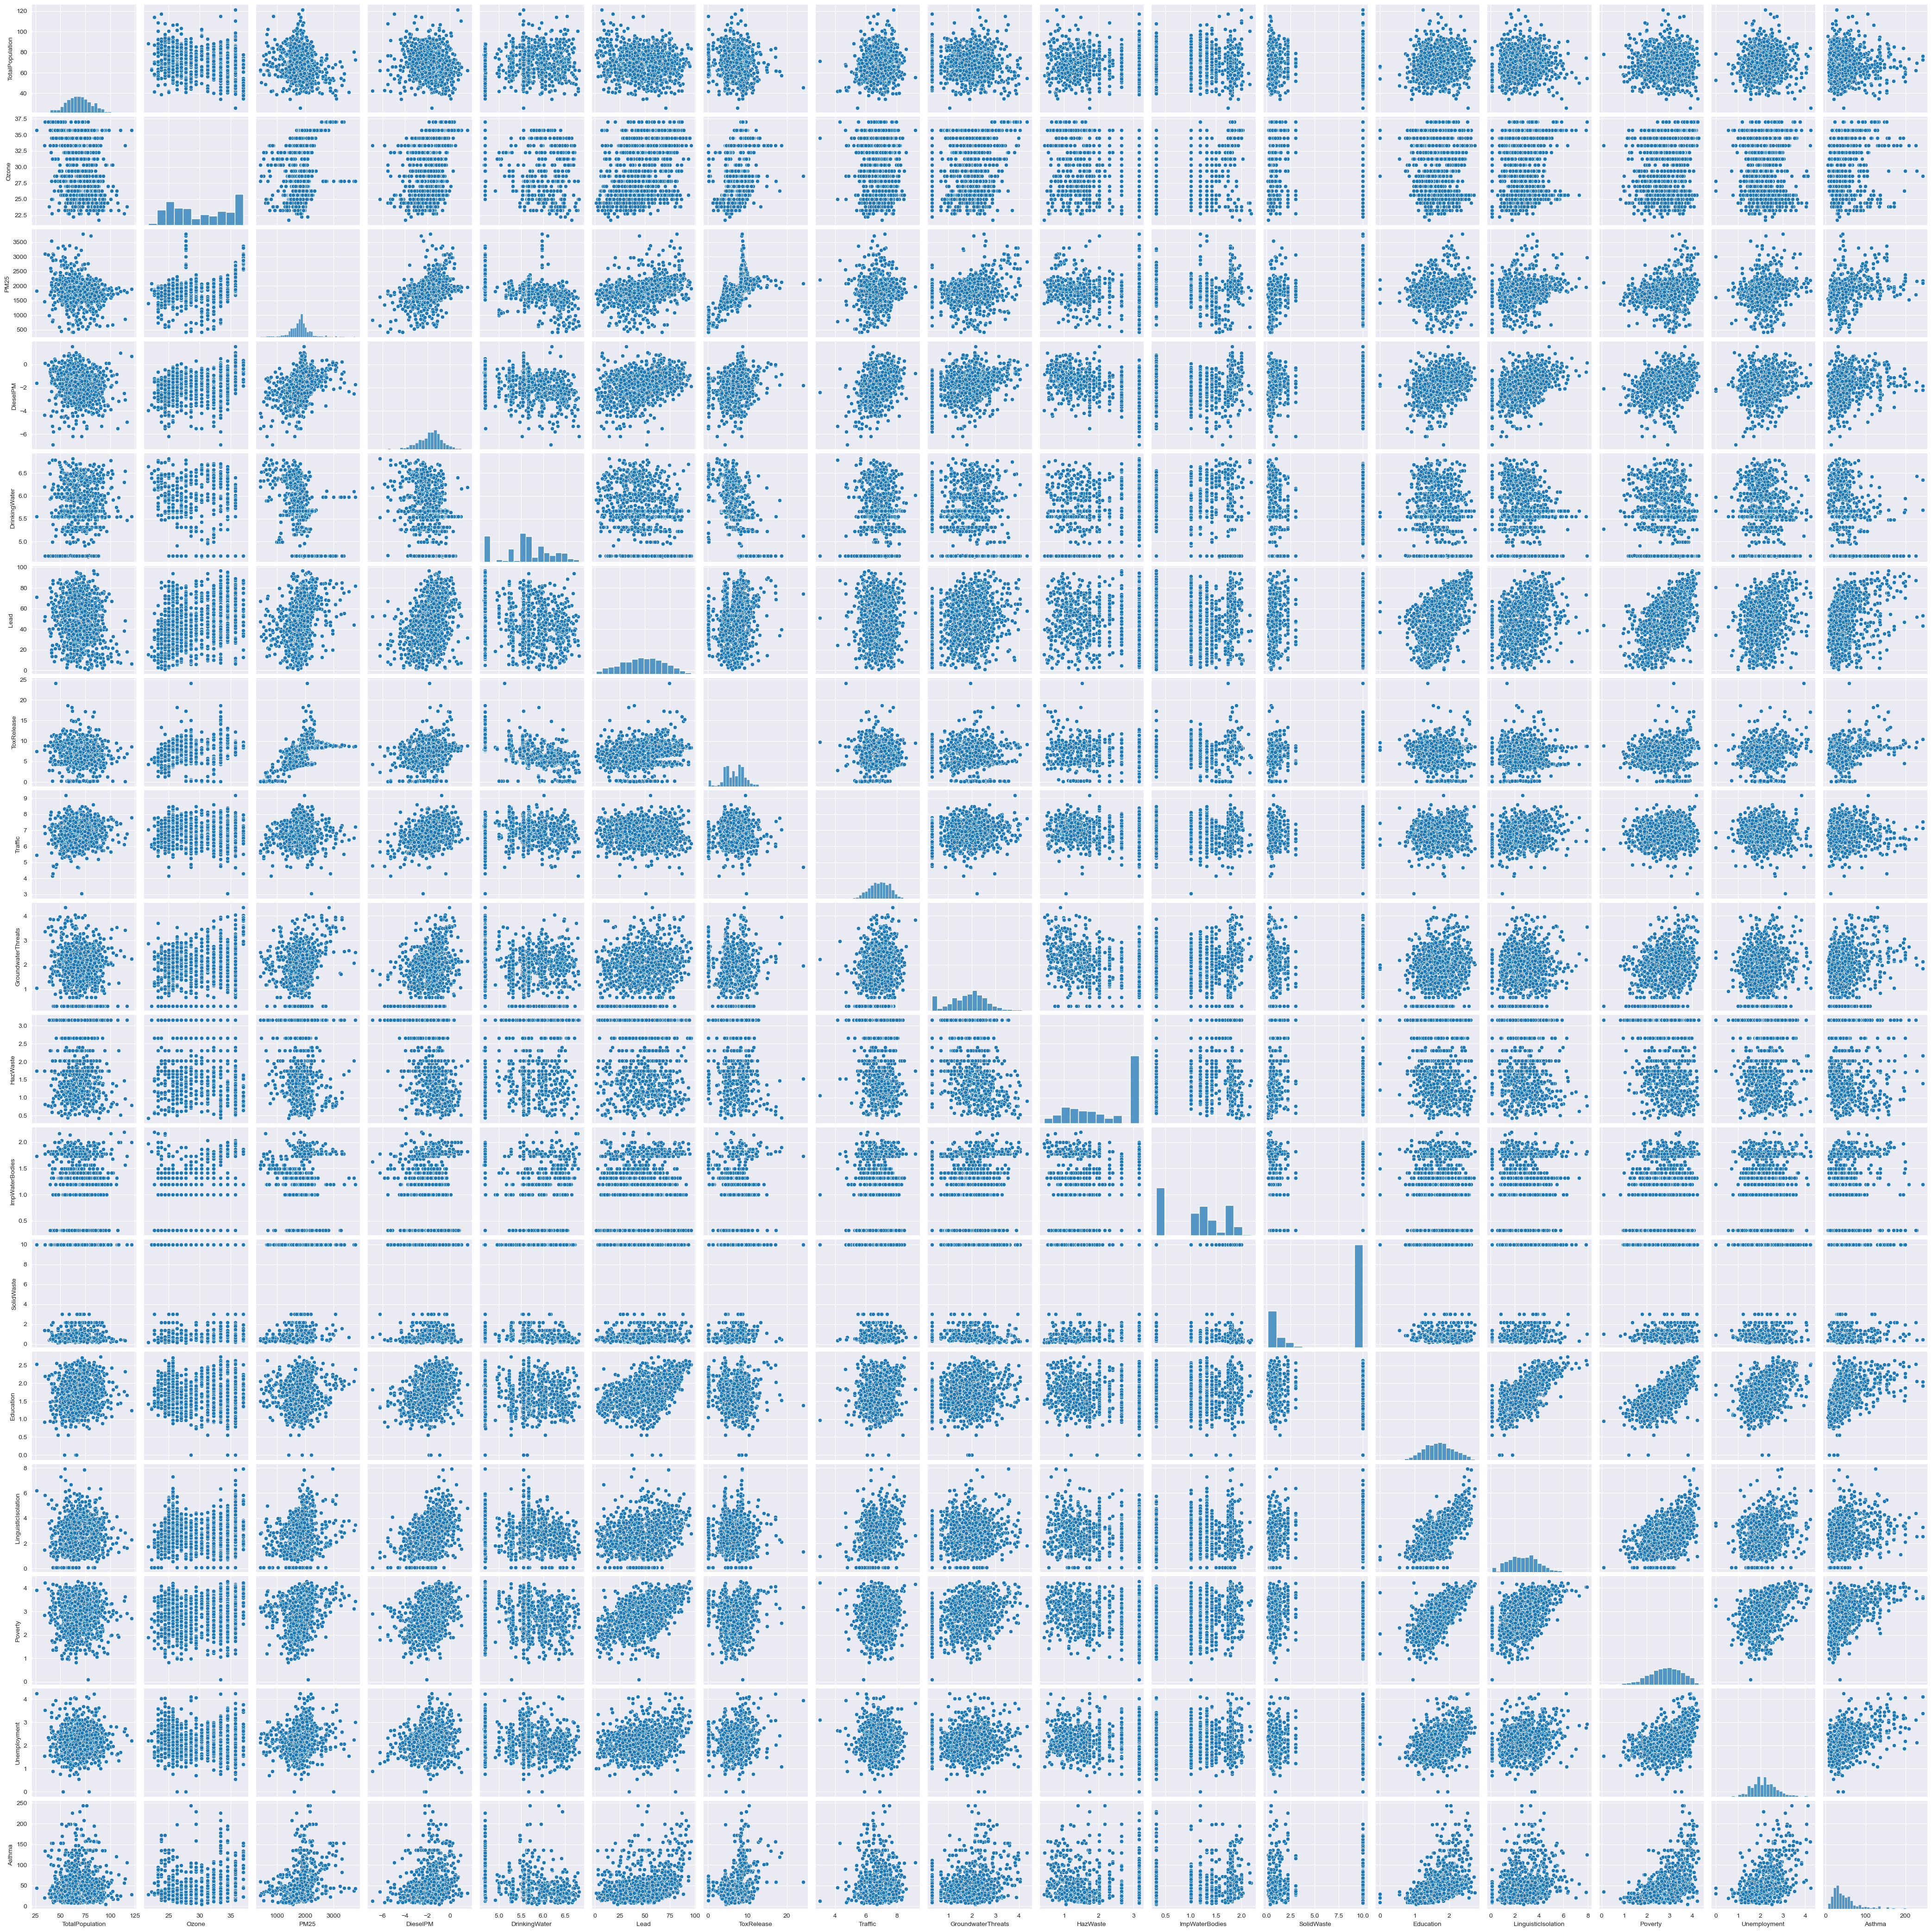

In [7]:
sns.pairplot(Xy_train)

Thoughts on data:  several variables have many values at descrete values mixed with continous values.  
Thoughts on correlation with Asthma:  Could be some linear and some quadratic.  



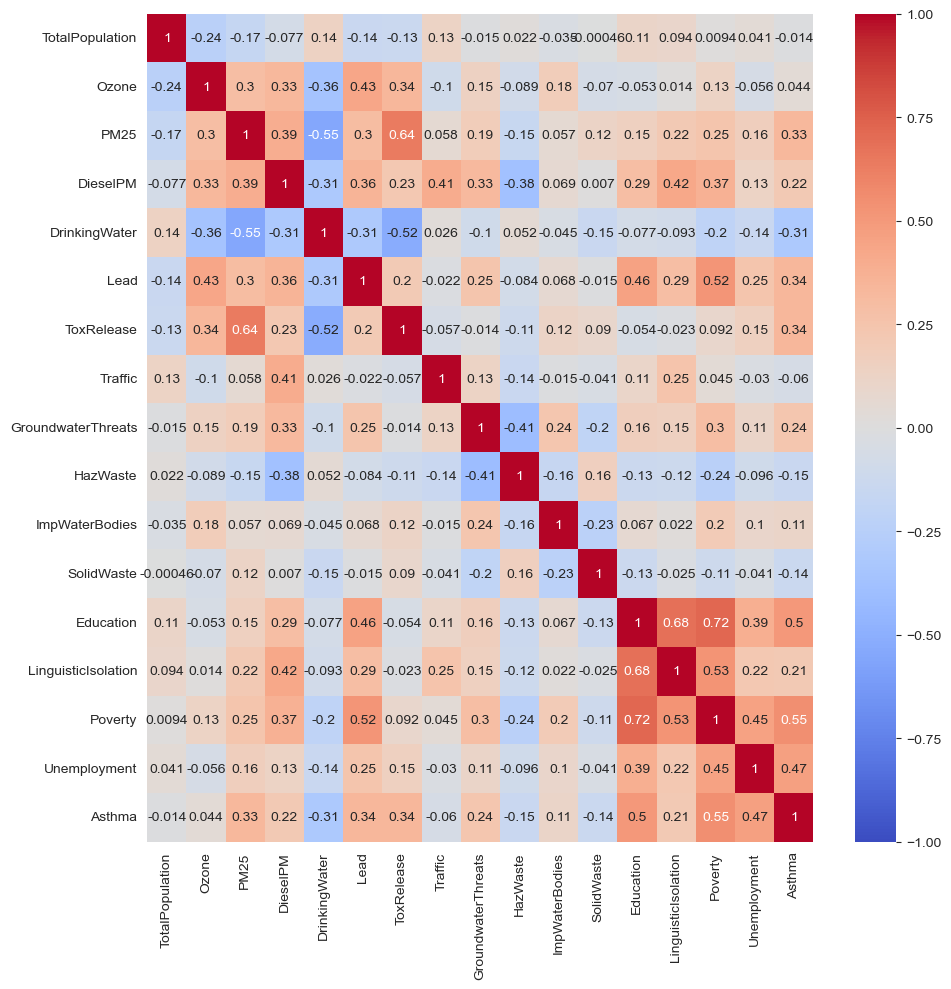

In [8]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(Xy_train.corr(), vmin=-1, vmax=1, cmap='coolwarm', annot=True)
fig.tight_layout()

The highest positive correlation with Asthma: Poverty, Education, and Unemployment  
The highest negative correlation with Asthma: DrinkingWater

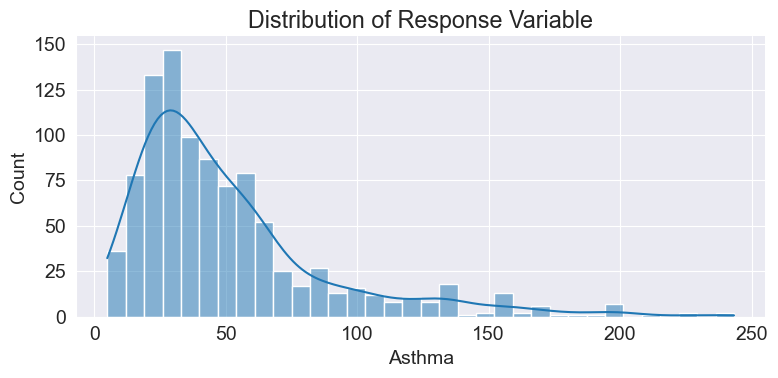

In [9]:
# Take a closer look at the ditribution of y (Asthma)
plt.rc('font',size=14)
fg = sns.displot(data=y_train, kde=True, aspect=2, height=4)
fig, ax = fg.fig, fg.ax
ax.set_title('Distribution of Response Variable')
fig.tight_layout()
fig.savefig('1_asthma_dist.png',dpi=300)

Looks like a transform would help.

In [10]:
yt, lamb, ci = stats.boxcox(y_train, alpha=0.05)
print(lamb)
print(ci)

-0.04608302727931742
(-0.12389786686186216, 0.03184927085925902)


Lets use a log transform

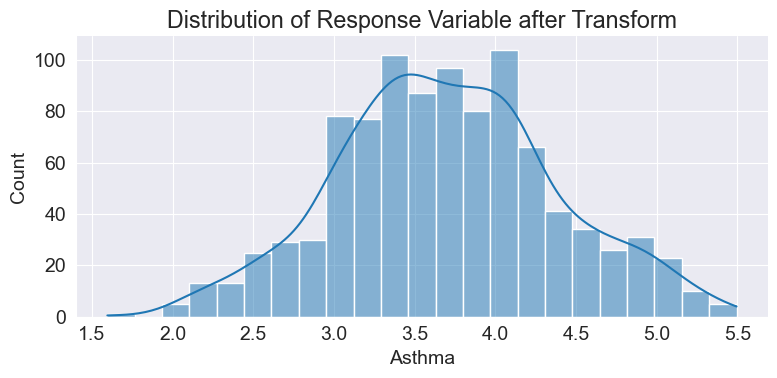

In [11]:
fg = sns.displot(data=y_train.apply(np.log), kde=True, aspect=2, height=4)
fig, ax = fg.fig, fg.ax
ax.set_title('Distribution of Response Variable after Transform')
fig.tight_layout()
fig.savefig('1_log_asthma_dist.png',dpi=300)

Not perfectly normal, but it is better. It is mostly symetrical.

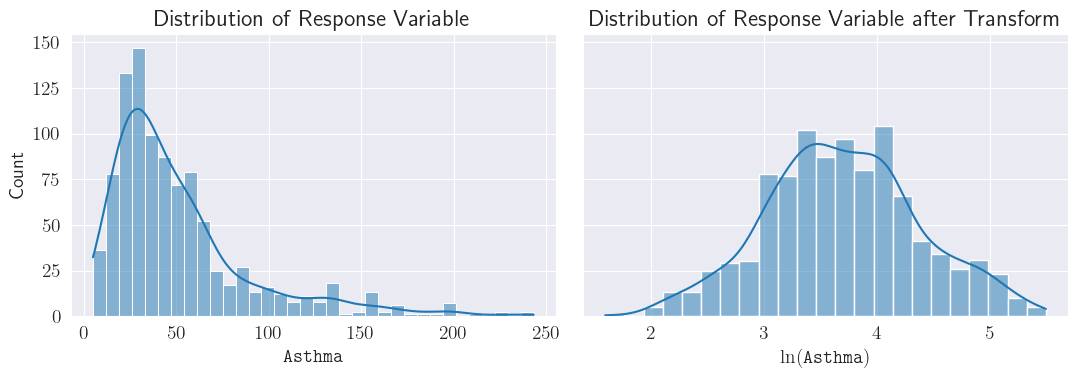

In [12]:
# put in same figure for report
plt.rcParams['text.usetex'] = True
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(11,4), sharey=True)
sns.histplot(data=y_train, kde=True, ax=ax1)
sns.histplot(data=y_train.apply(np.log), kde=True, ax=ax2)
ax1.set_title('Distribution of Response Variable')
ax2.set_title('Distribution of Response Variable after Transform')
ax1.set_xlabel(r'\texttt{Asthma}')
ax2.set_xlabel(r'$\ln(\texttt{Asthma})$')
fig.tight_layout()
fig.savefig('1_asthma_dist_combined.png', dpi=300)

In [13]:
import warnings
# turn off warnings becuase the next cell generates a performance warning multiple times due to the line multiplying columns together
warnings.filterwarnings('ignore')

In [14]:
# Build normalized dataframe with quadratic terms and two-factor interactions. The column names are set to match Patsy formulas and to ensure first order terms will always be include if quadratic or interaction terms are included. 

X_poly = X_train.apply(stats.zscore)
for ii in range(len(X_poly.columns)):
    col1 = X_poly.columns[ii]
    X_poly[f'{col1} + I({col1}**2)'] = X_poly[col1] ** 2
    for jj in range(ii+1,len(X_train.columns)):
        col2 = X_poly.columns[jj]
        X_poly[f'{col1}*{col2}'] = X_poly[col1] * X_poly[col2]
X_poly.head()   

TotalPopulation     Ozone      PM25  DieselPM  DrinkingWater   
CensusTract                                                                 
1026                0.064712 -0.528439 -0.713405  0.291547       0.583146  \
896                 0.367159 -0.865229  0.202259  0.404563       0.063169   
118                -0.900398  1.299847  2.141543  1.075793      -1.697607   
1090                0.622888  1.016147  0.261646 -0.157950      -0.144580   
243                -0.584922 -1.020670  0.065626  0.619724       0.063169   

                 Lead  ToxRelease   Traffic  GroundwaterThreats  HazWaste   
CensusTract                                                                 
1026        -0.316718   -0.610974  0.300020            0.646828 -1.495088  \
896          0.868812   -0.723071  0.673614            0.646828  1.021000   
118          1.746840    0.630322 -1.507985            0.849277  1.021000   
1090         0.933851    0.474174 -0.684628           -1.912842  1.021000   
243         -0.415711   -0.899725  1.113592           -0.493687 -1.388891   

             ...  Education + I(Education**2)  Education*LinguisticIsolation   
CensusTract  ...                                                               
1026         ...                     0.057394                      -0.110254  \
896          ...                     0.013516                      -0.032015   
118          ...                     1.325542                       2.508281   
1090         ...                     0.325067                       0.241916   
243          ...                     0.687788                       0.371789   

             Education*Poverty  Education*Unemployment   
CensusTract                                              
1026                  0.051083                0.112741  \
896                  -0.015017                0.131229   
118                   1.918651                1.484184   
1090                  0.137987               -0.643558   
243                   1.126800                0.572521   

             LinguisticIsolation + I(LinguisticIsolation**2)   
CensusTract                                                    
1026                                                0.211798  \
896                                                 0.075831   
118                                                 4.746341   
1090                                                0.180035   
243                                                 0.200973   

             LinguisticIsolation*Poverty  LinguisticIsolation*Unemployment   
CensusTract                                                                  
1026                           -0.098132                         -0.216575  \
896                             0.035570                         -0.310831   
118                             3.630602                          2.808476   
1090                            0.102691                         -0.478939   
243                             0.609100                          0.309480   

             Poverty + I(Poverty**2)  Poverty*Unemployment   
CensusTract                                                  
1026                        0.045467              0.100345  \
896                         0.016684             -0.145800   
118                         2.777144              2.148277   
1090                        0.058574             -0.273183   
243                         1.846031              0.937959   

             Unemployment + I(Unemployment**2)  
CensusTract                                     
1026                                  0.221461  
896                                   1.274098  
118                                   1.661814  
1090                                  1.274098  
243                                   0.476572  

[5 rows x 152 columns]

In [15]:
# turn warnings back on
warnings.filterwarnings('default')

# Model Selection

## Lasso, minimize BIC

In [16]:
# build dataframe with coefficents for various alphas
coefs = pd.DataFrame(columns=X_poly.columns)
for alpha in np.arange(0.01,2,0.01):
    alpha = np.round(alpha,2)
    lm = Lasso(alpha=alpha, max_iter=10000)
    lm.fit(X_poly, np.log(y_train))
    coefs.loc[alpha] = (lm.coef_)

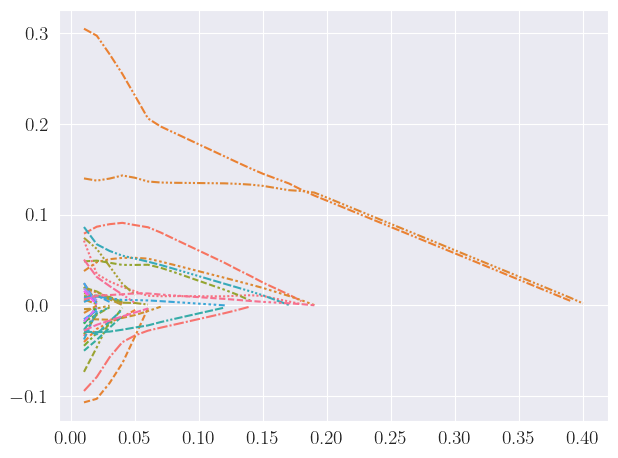

In [17]:
fig, ax = plt.subplots()
sns.lineplot(data=coefs[coefs != 0], ax=ax, legend=False)
fig.tight_layout()

Build formulas for each one, fit model, and find the lowest BIC.

In [18]:
def build_formula(alpha):
    non_zero_coefs = coefs.loc[alpha][coefs.loc[alpha] != 0]
    formula = 'I(np.log(Asthma)) ~ '
    for term in non_zero_coefs.index:
        formula += f'{term} + '
    return formula[:-3]

In [19]:
def mdl(formula):
    return smf.ols(formula, data=Xy_train).fit()

In [20]:
bicmin = 1000000
alpha_best = 0
for alpha in np.arange(0.01,0.4,0.01):
    alpha = np.round(alpha,2)
    bic = mdl(build_formula(alpha)).bic
    if bic <= bicmin:
        bicmin = bic
        alpha_best = alpha

print(f'Best alpha to minimize BIC: {alpha_best}, minimum BIC: {bicmin}')

formula = build_formula(alpha_best)
print(f'\nformula:\n{formula}')

Best alpha to minimize BIC: 0.04, minimum BIC: 1207.4766764774847

formula:
I(np.log(Asthma)) ~ PM25 + DrinkingWater + ToxRelease + GroundwaterThreats + SolidWaste + Education + LinguisticIsolation + Poverty + Unemployment + TotalPopulation*DieselPM + TotalPopulation*ImpWaterBodies + Ozone + I(Ozone**2) + Ozone*DieselPM + Ozone*Traffic + Ozone*GroundwaterThreats + Ozone*Poverty + DieselPM*Unemployment + DrinkingWater*GroundwaterThreats + DrinkingWater*LinguisticIsolation + Lead + I(Lead**2) + ToxRelease + I(ToxRelease**2) + LinguisticIsolation + I(LinguisticIsolation**2) + Poverty*Unemployment + Unemployment + I(Unemployment**2)


In [21]:
model = mdl(formula)
print(model.summary2())

                         Results: Ordinary least squares
Model:                    OLS                   Adj. R-squared:         0.640    
Dependent Variable:       I(np.log(Asthma))     AIC:                    1056.0576
Date:                     2023-09-06 21:07      BIC:                    1207.4767
No. Observations:         977                   Log-Likelihood:         -497.03  
Df Model:                 30                    F-statistic:            58.86    
Df Residuals:             946                   Prob (F-statistic):     4.63e-193
R-squared:                0.651                 Scale:                  0.16727  
---------------------------------------------------------------------------------
                                   Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
---------------------------------------------------------------------------------
Intercept                          6.6424   2.0604  3.2238 0.0013  2.5989 10.6859
PM25                               0.0001

Now use backward elimination to try and lower BIC

In [22]:
model = mdl(formula + ' - I(Unemployment ** 2) - I(ToxRelease ** 2) - Ozone:DieselPM - PM25 - TotalPopulation:ImpWaterBodies')
print(f'{model.bic}\n')
print(f'{model.pvalues.sort_values(ascending=False)}\n')

# used to check how many times a parameter is used to ensure we don't removed first order terms that are used in interactions or quadratics
for col in X_train.columns.sort_values():
    counter = 0
    for param in model.params.index:
        if col in param:
            counter += 1
    if counter > 0:
        print(f'{counter} {col}')

1180.0741148083828

GroundwaterThreats                   6.089329e-01
TotalPopulation                      1.085854e-02
TotalPopulation:DieselPM             6.557568e-03
DrinkingWater:GroundwaterThreats     5.810694e-03
DrinkingWater                        3.890076e-03
I(LinguisticIsolation ** 2)          2.883705e-03
Ozone:Traffic                        2.840014e-03
Traffic                              2.241677e-03
ImpWaterBodies                       1.515796e-03
SolidWaste                           1.226271e-03
Ozone:GroundwaterThreats             1.032355e-03
Unemployment                         5.227274e-04
LinguisticIsolation                  3.516739e-04
Poverty:Unemployment                 2.272471e-04
DieselPM:Unemployment                9.061009e-05
I(Ozone ** 2)                        8.157925e-05
Poverty                              3.183819e-05
DrinkingWater:LinguisticIsolation    2.548844e-05
Ozone                                1.311329e-05
Intercept                     

The BIC increased when the next term was removed, but I will keep going to see if it was just a local minimum.

In [23]:
model = mdl(formula + ' - I(Unemployment ** 2) - I(ToxRelease ** 2) - Ozone:DieselPM - PM25 - TotalPopulation:ImpWaterBodies - TotalPopulation:DieselPM - TotalPopulation')
print(f'{model.bic}\n')
print(f'{model.pvalues.sort_values(ascending=False)}\n')

# used to check how many times a parameter is used to ensure we don't removed first order terms that are used in interactions or quadratics
for col in X_train.columns.sort_values():
    counter = 0
    for param in model.params.index:
        if col in param:
            counter += 1
    if counter > 0:
        print(f'{counter} {col}')

1174.326699815287

GroundwaterThreats                   7.907923e-01
DrinkingWater:GroundwaterThreats     8.437028e-03
DrinkingWater                        6.469549e-03
I(LinguisticIsolation ** 2)          3.698697e-03
Ozone:Traffic                        2.960056e-03
Traffic                              2.384896e-03
ImpWaterBodies                       1.793317e-03
SolidWaste                           1.340807e-03
LinguisticIsolation                  4.051534e-04
Ozone:GroundwaterThreats             2.829490e-04
Unemployment                         1.707175e-04
Poverty                              1.270311e-04
Poverty:Unemployment                 9.638573e-05
DrinkingWater:LinguisticIsolation    2.869786e-05
I(Ozone ** 2)                        1.223875e-05
DieselPM:Unemployment                1.108582e-05
DieselPM                             2.338297e-06
Ozone                                1.151928e-06
Ozone:Poverty                        9.829025e-07
Intercept                      

This is the new lowest BIC, but lets keep going to make sure.

In [24]:
# This is the lowest BIC
model = mdl(formula + ' - I(Unemployment ** 2) - I(ToxRelease ** 2) - Ozone:DieselPM - PM25 - TotalPopulation:ImpWaterBodies - TotalPopulation:DieselPM - TotalPopulation - DrinkingWater:GroundwaterThreats - Ozone:Traffic - Traffic')
print(f'{model.bic}\n')
print(f'{model.pvalues.sort_values(ascending=False)}\n')

# used to check how many times a parameter is used to ensure we don't removed first order terms that are used in interactions or quadratics
for col in X_train.columns.sort_values():
    counter = 0
    for param in model.params.index:
        if col in param:
            counter += 1
    if counter > 0:
        print(f'{counter} {col}')

1170.2665447107186

DrinkingWater                        9.277678e-02
SolidWaste                           1.489705e-03
ImpWaterBodies                       1.457998e-03
I(LinguisticIsolation ** 2)          9.800627e-04
Poverty                              2.062977e-04
Unemployment                         1.693259e-04
Poverty:Unemployment                 9.695511e-05
LinguisticIsolation                  1.619401e-05
DieselPM:Unemployment                1.263176e-05
DieselPM                             9.302156e-06
GroundwaterThreats                   3.094369e-06
Ozone:Poverty                        2.650457e-06
Ozone                                1.825315e-06
DrinkingWater:LinguisticIsolation    6.487594e-07
I(Ozone ** 2)                        2.180761e-07
I(Lead ** 2)                         8.997633e-08
Ozone:GroundwaterThreats             8.389942e-08
Lead                                 9.958454e-09
Intercept                            5.774065e-09
ToxRelease                    

This is the new lowest BIC, but lets keep going to make sure.

In [25]:
# removing more terms just to be sure the BIC doesn't go back down
model = mdl(formula + ' - I(Unemployment ** 2) - I(ToxRelease ** 2) - Ozone:DieselPM - PM25 - TotalPopulation:ImpWaterBodies - TotalPopulation:DieselPM - TotalPopulation - DrinkingWater:GroundwaterThreats - Ozone:Traffic - Traffic - SolidWaste - ImpWaterBodies - I(LinguisticIsolation ** 2) - Poverty:Unemployment - DieselPM:Unemployment - DieselPM - Unemployment')
print(f'{model.bic}\n')
print(f'{model.pvalues.sort_values(ascending=False)}\n')

# used to check how many times a parameter is used to ensure we don't removed first order terms that are used in interactions or quadratics
for col in X_train.columns.sort_values():
    counter = 0
    for param in model.params.index:
        if col in param:
            counter += 1
    if counter > 0:
        print(f'{counter} {col}')

1189.5718833649191

DrinkingWater                        2.037958e-01
LinguisticIsolation                  1.516936e-03
GroundwaterThreats                   4.215752e-05
DrinkingWater:LinguisticIsolation    9.242743e-06
Ozone                                3.452538e-06
Intercept                            1.293659e-06
Ozone:GroundwaterThreats             1.006214e-06
I(Ozone ** 2)                        2.075312e-07
Ozone:Poverty                        1.870093e-07
I(Lead ** 2)                         1.646309e-10
Lead                                 2.533749e-11
Poverty                              2.313616e-11
ToxRelease                           1.115467e-18
Education                            4.791508e-43
dtype: float64

2 DrinkingWater
1 Education
2 GroundwaterThreats
2 Lead
2 LinguisticIsolation
4 Ozone
2 Poverty
1 ToxRelease


I tried removing several more terms but the BIC kept increasing. Lets go back to the lowest BIC.

In [26]:
# save the lowest BIC model
model1 = mdl(formula + ' - I(Unemployment ** 2) - I(ToxRelease ** 2) - Ozone:DieselPM - PM25 - TotalPopulation:ImpWaterBodies - TotalPopulation:DieselPM - TotalPopulation - DrinkingWater:GroundwaterThreats - Ozone:Traffic - Traffic')
print(f'{model1.summary2()}')


                         Results: Ordinary least squares
Model:                    OLS                   Adj. R-squared:         0.632    
Dependent Variable:       I(np.log(Asthma))     AIC:                    1067.6923
Date:                     2023-09-06 21:07      BIC:                    1170.2665
No. Observations:         977                   Log-Likelihood:         -512.85  
Df Model:                 20                    F-statistic:            84.86    
Df Residuals:             956                   Prob (F-statistic):     8.98e-196
R-squared:                0.640                 Scale:                  0.17096  
---------------------------------------------------------------------------------
                                   Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
---------------------------------------------------------------------------------
Intercept                          6.3998   1.0890  5.8768 0.0000  4.2627  8.5369
DrinkingWater                      0.1006

Only one term (DrinkingWater) is not significate (with $\alpha=0.05$), all others are significant with $\alpha=0.01$

## Lasso, minimize AIC

Similar to before, but look for the lowest AIC

In [27]:
aicmin = 1000000
alpha_best = 0
for alpha in np.arange(0.01,0.4,0.01):
    alpha = np.round(alpha,2)
    aic = mdl(build_formula(alpha)).aic
    if aic <= aicmin:
        aicmin = aic
        alpha_best = alpha

print(f'Best alpha to minimize AIC: {alpha_best}, minimum AIC: {aicmin}')

formula = build_formula(alpha_best)
print(f'\nformula:\n{formula}')

Best alpha to minimize AIC: 0.01, minimum AIC: 973.3696271626711

formula:
I(np.log(Asthma)) ~ Ozone + PM25 + DrinkingWater + ToxRelease + Traffic + GroundwaterThreats + HazWaste + ImpWaterBodies + SolidWaste + Education + LinguisticIsolation + Poverty + Unemployment + TotalPopulation + I(TotalPopulation**2) + TotalPopulation*PM25 + TotalPopulation*DieselPM + TotalPopulation*DrinkingWater + TotalPopulation*Traffic + TotalPopulation*ImpWaterBodies + TotalPopulation*SolidWaste + TotalPopulation*Education + TotalPopulation*LinguisticIsolation + TotalPopulation*Poverty + TotalPopulation*Unemployment + Ozone + I(Ozone**2) + Ozone*DieselPM + Ozone*ToxRelease + Ozone*Traffic + Ozone*GroundwaterThreats + Ozone*ImpWaterBodies + Ozone*SolidWaste + Ozone*Education + Ozone*LinguisticIsolation + Ozone*Poverty + PM25 + I(PM25**2) + PM25*ToxRelease + PM25*HazWaste + PM25*Education + PM25*LinguisticIsolation + DieselPM*DrinkingWater + DieselPM*GroundwaterThreats + DieselPM*HazWaste + DieselPM*SolidWas

In [28]:
model = mdl(formula)
print(model.summary2())

                           Results: Ordinary least squares
Model:                     OLS                     Adj. R-squared:           0.684    
Dependent Variable:        I(np.log(Asthma))       AIC:                      973.3696 
Date:                      2023-09-06 21:07        BIC:                      1354.3596
No. Observations:          977                     Log-Likelihood:           -408.68  
Df Model:                  77                      F-statistic:              28.43    
Df Residuals:              899                     Prob (F-statistic):       5.60e-191
R-squared:                 0.709                   Scale:                    0.14689  
--------------------------------------------------------------------------------------
                                        Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
--------------------------------------------------------------------------------------
Intercept                               4.6503   3.0716  1.5139 0.1304 

Now use backward elimination to try and lower AIC

In [29]:
# I kept using this cell iteratively, and saved the lowest AIC below, that way I could keep removing terms to be sure it was the minimum.
model = mdl(formula + ' - TotalPopulation:PM25 - ToxRelease:ImpWaterBodies - ToxRelease:Traffic - I(Unemployment ** 2) - TotalPopulation:Traffic - I(Poverty ** 2) - ImpWaterBodies:LinguisticIsolation - DieselPM:DrinkingWater - DieselPM:SolidWaste - ToxRelease:Unemployment - I(ToxRelease ** 2) - Ozone:DieselPM - DrinkingWater:ImpWaterBodies - GroundwaterThreats:Unemployment - TotalPopulation:DrinkingWater - TotalPopulation:SolidWaste - ToxRelease:Poverty - PM25:HazWaste - I(HazWaste ** 2) - DrinkingWater:LinguisticIsolation - Ozone:LinguisticIsolation - Traffic:Unemployment - TotalPopulation:DieselPM - Ozone:Education - Ozone:SolidWaste - TotalPopulation:Unemployment - I(TotalPopulation ** 2) - TotalPopulation:ImpWaterBodies - Lead:SolidWaste - DrinkingWater:Education')
print(f'{model.aic}\n')
print(f'{model.pvalues.sort_values(ascending=False).head(10)}\n')

# used to check how many times a parameter is used to ensure we don't removed first order terms that are used in interactions or quadratics
for col in X_train.columns.sort_values():
    counter = 0
    for param in model.params.index:
        if col in param:
            counter += 1
    if counter > 0:
        print(f'{counter} {col}')

953.2589429484635

GroundwaterThreats          0.640447
LinguisticIsolation         0.629182
Education                   0.586545
Poverty                     0.439158
ToxRelease                  0.384976
TotalPopulation             0.353188
SolidWaste                  0.075928
DrinkingWater:SolidWaste    0.074512
Lead:LinguisticIsolation    0.048850
Ozone:ImpWaterBodies        0.035656
dtype: float64

4 DieselPM
4 DrinkingWater
5 Education
5 GroundwaterThreats
4 HazWaste
3 ImpWaterBodies
6 Lead
6 LinguisticIsolation
7 Ozone
5 PM25
6 Poverty
3 SolidWaste
4 TotalPopulation
6 ToxRelease
3 Traffic
3 Unemployment


In [30]:
# Lowest AIC model
model2 = mdl(formula + ' - TotalPopulation:PM25 - ToxRelease:ImpWaterBodies - ToxRelease:Traffic - I(Unemployment ** 2) - TotalPopulation:Traffic - I(Poverty ** 2) - ImpWaterBodies:LinguisticIsolation - DieselPM:DrinkingWater - DieselPM:SolidWaste - ToxRelease:Unemployment - I(ToxRelease ** 2) - Ozone:DieselPM - DrinkingWater:ImpWaterBodies - GroundwaterThreats:Unemployment - TotalPopulation:DrinkingWater - TotalPopulation:SolidWaste - ToxRelease:Poverty - PM25:HazWaste - I(HazWaste ** 2) - DrinkingWater:LinguisticIsolation - Ozone:LinguisticIsolation - Traffic:Unemployment')
model2.aic

947.9076942596448

In [31]:
print(f'{model2.summary2()}')

                           Results: Ordinary least squares
Model:                     OLS                     Adj. R-squared:           0.686    
Dependent Variable:        I(np.log(Asthma))       AIC:                      947.9077 
Date:                      2023-09-06 21:07        BIC:                      1221.4389
No. Observations:          977                     Log-Likelihood:           -417.95  
Df Model:                  55                      F-statistic:              39.69    
Df Residuals:              921                     Prob (F-statistic):       3.64e-204
R-squared:                 0.703                   Scale:                    0.14613  
--------------------------------------------------------------------------------------
                                        Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
--------------------------------------------------------------------------------------
Intercept                               4.8437   2.0317  2.3841 0.0173 

In [32]:
# Several terms are not significant
model2.pvalues[model2.pvalues > 0.05].sort_values(ascending=False)

GroundwaterThreats                0.961422
Poverty                           0.916986
TotalPopulation                   0.564482
ImpWaterBodies                    0.362436
LinguisticIsolation               0.347070
ToxRelease                        0.305042
TotalPopulation:DieselPM          0.169767
Ozone:Education                   0.147939
Ozone:SolidWaste                  0.134170
Lead:SolidWaste                   0.112958
TotalPopulation:Unemployment      0.111506
Lead                              0.080837
I(TotalPopulation ** 2)           0.078505
HazWaste                          0.065370
TotalPopulation:ImpWaterBodies    0.060888
dtype: float64

## Method 3 (Lasso Train/Val Comparison)

In [33]:
alphas = []
train = []
val = []
alpha_max = 0.3
for alpha in np.arange(0.01,alpha_max,0.01):
    alpha = np.round(alpha,2)
    alphas.append(alpha)
    pred_train = np.exp(smf.ols(build_formula(alpha), Xy_train).fit().fittedvalues)
    pred_val = np.exp(smf.ols(build_formula(alpha), Xy_train).fit().predict(X_val))
    train.append(mean_squared_error(y_train, pred_train, squared=False))
    val.append(mean_squared_error(y_val, pred_val, squared=False))
df_comp = pd.DataFrame({'Alpha':alphas, 'Training':train, 'Validation':val})

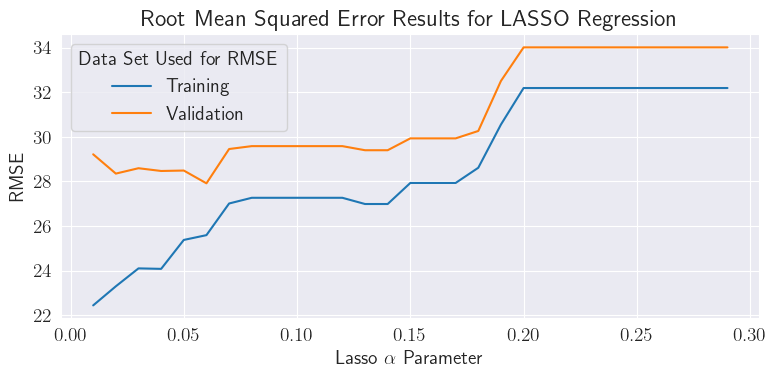

In [34]:
fig, ax = plt.subplots(figsize=(8,4))
sns.lineplot(data=df_comp, x='Alpha', y='Training', label='Training', ax=ax)
sns.lineplot(data=df_comp, x='Alpha', y='Validation', label='Validation', ax=ax)
ax.set_ylabel('RMSE')
ax.set_xlabel(r'Lasso $\alpha$ Parameter')
ax.legend(title='Data Set Used for RMSE')
ax.set_title('Root Mean Squared Error Results for LASSO Regression')
fig.tight_layout()
fig.savefig('1_rmse_lasso.png',dpi=300)


In [35]:
df_comp.iloc[df_comp['Validation'].argmin()]

Alpha          0.060000
Training      25.589923
Validation    27.913904
Name: 5, dtype: float64

In [36]:
formula = build_formula(df_comp.iloc[df_comp['Validation'].argmin()]['Alpha'])
model3 = mdl(formula)
model3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                   OLS                   Adj. R-squared:         0.603    
Dependent Variable:      I(np.log(Asthma))     AIC:                    1141.3308
Date:                    2023-09-06 21:07      BIC:                    1243.9050
No. Observations:        977                   Log-Likelihood:         -549.67  
Df Model:                20                    F-statistic:            75.23    
Df Residuals:            956                   Prob (F-statistic):     2.66e-180
R-squared:               0.611                 Scale:                  0.18435  
--------------------------------------------------------------------------------
                                  Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
--------------------------------------------------------------------------------
Intercept                         1.9003   0.6353  2.9912 0.0029  0.6535  3.1470
PM25                              0.0001   0.0001  1.2262 0.2204 -0.0000  0.0002
DrinkingWater                     0.0948   0.0714  1.3262 0.1851 -0.0455  0.2350
ToxRelease                        0.0466   0.0177  2.6389 0.0085  0.0120  0.0813
Education                         0.8965   0.0611 14.6773 0.0000  0.7766  1.0163
LinguisticIsolation              -0.0936   0.0384 -2.4385 0.0149 -0.1689 -0.0183
Poverty                           0.2404   0.0336  7.1493 0.0000  0.1744  0.3064
Unemployment                     -0.1312   0.1194 -1.0988 0.2721 -0.3655  0.1031
TotalPopulation                  -0.0045   0.0019 -2.4210 0.0157 -0.0081 -0.0008
DieselPM                         -0.0359   0.1224 -0.2934 0.7693 -0.2762  0.2044
TotalPopulation:DieselPM         -0.0022   0.0008 -2.7408 0.0062 -0.0037 -0.0006
Ozone                            -0.0130   0.0116 -1.1177 0.2640 -0.0358  0.0098
Ozone:DieselPM                    0.0068   0.0032  2.1508 0.0317  0.0006  0.0131
GroundwaterThreats                0.4210   0.2749  1.5314 0.1260 -0.1185  0.9604
Ozone:GroundwaterThreats          0.0085   0.0046  1.8551 0.0639 -0.0005  0.0175
DrinkingWater:GroundwaterThreats -0.1114   0.0329 -3.3885 0.0007 -0.1760 -0.0469
Lead                             -0.0161   0.0029 -5.5514 0.0000 -0.0217 -0.0104
I(Lead ** 2)                      0.0002   0.0000  5.0664 0.0000  0.0001  0.0002
I(ToxRelease ** 2)               -0.0003   0.0010 -0.2858 0.7751 -0.0022  0.0016
I(LinguisticIsolation ** 2)      -0.0133   0.0059 -2.2549 0.0244 -0.0248 -0.0017
I(Unemployment ** 2)              0.0538   0.0260  2.0722 0.0385  0.0029  0.1048
--------------------------------------------------------------------------------
Omnibus:                   10.369            Durbin-Watson:               2.052 
Prob(Omnibus):             0.006             Jarque-Bera (JB):            14.417
Skew:                      -0.091            Prob(JB):                    0.001 
Kurtosis:                  3.567             Condition No.:               186307
================================================================================
* The condition number is large (2e+05). This might indicate             strong
multicollinearity or other numerical problems.
"""

In [37]:
model3.pvalues[model3.pvalues > 0.05].sort_values(ascending=False)

I(ToxRelease ** 2)          0.775069
DieselPM                    0.769287
Unemployment                0.272113
Ozone                       0.263969
PM25                        0.220417
DrinkingWater               0.185104
GroundwaterThreats          0.125992
Ozone:GroundwaterThreats    0.063893
dtype: float64

In [38]:
# see if doing backward elimination improves performance at all
# I kept using this cell iteratively, and saved the lowest RMSE below, that way I could keep removing terms to be sure it was the minimum.
model = mdl(formula + ' - I(ToxRelease**2) - PM25 - I(Unemployment**2) - Ozone:GroundwaterThreats - I(LinguisticIsolation**2) - Ozone:DieselPM - Ozone  - TotalPopulation:DieselPM - TotalPopulation - DieselPM')
rmse_train = np.sqrt(mean_squared_error(y_train, np.exp(model.predict(X_train))))
rmse_val = np.sqrt(mean_squared_error(y_val, np.exp(model.predict(X_val))))
print(f'Train   Val')
print(f'{rmse_train:.2f}  {rmse_val:.2f}\n')

print(f'{model.pvalues.sort_values(ascending=False).head(10)}\n')

# used to check how many times a parameter is used to ensure we don't removed first order terms that are used in interactions or quadratics
for col in X_train.columns.sort_values():
    counter = 0
    for param in model.params.index:
        if col in param:
            counter += 1
    if counter > 0:
        print(f'{counter} {col}')

Train   Val
26.07  27.57

Intercept                           1.265735e-01
DrinkingWater                       1.167596e-02
Unemployment                        1.306762e-05
DrinkingWater:GroundwaterThreats    1.181264e-07
GroundwaterThreats                  8.838408e-09
I(Lead ** 2)                        7.941335e-09
Lead                                8.934225e-12
Poverty                             2.148890e-12
ToxRelease                          2.952919e-17
LinguisticIsolation                 1.027660e-25
dtype: float64

2 DrinkingWater
1 Education
2 GroundwaterThreats
2 Lead
1 LinguisticIsolation
1 Poverty
1 ToxRelease
1 Unemployment


In [39]:
# model with the lowest RMSE for validation
model3 = mdl(formula + ' - I(ToxRelease**2) - PM25 - I(Unemployment**2) - Ozone:GroundwaterThreats - I(LinguisticIsolation**2) - Ozone:DieselPM')
rmse_train = np.sqrt(mean_squared_error(y_train, np.exp(model3.predict(X_train))))
rmse_val = np.sqrt(mean_squared_error(y_val, np.exp(model3.predict(X_val))))
print(f'      Train   Val')
print(f'RMSE: {rmse_train:.2f}  {rmse_val:.2f}\n')
print(model3.summary2())

      Train   Val
RMSE: 25.62  27.28

                         Results: Ordinary least squares
Model:                    OLS                   Adj. R-squared:         0.597    
Dependent Variable:       I(np.log(Asthma))     AIC:                    1150.6676
Date:                     2023-09-06 21:07      BIC:                    1223.9349
No. Observations:         977                   Log-Likelihood:         -560.33  
Df Model:                 14                    F-statistic:            104.3    
Df Residuals:             962                   Prob (F-statistic):     1.04e-181
R-squared:                0.603                 Scale:                  0.18724  
---------------------------------------------------------------------------------
                                  Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
---------------------------------------------------------------------------------
Intercept                         1.3346   0.4435   3.0091 0.0027  0.4642  2.2050
Dri

The RMSE did decrease.  
For this model all terms are significant with $\alpha=0.02$

# Compare Models

In [91]:
models = [model1, model2, model3]

print('Model   # Terms    R2     R2a      AIC       BIC      RMSE_Train    RMSE_Val   EVS_Train    EVS_Val')
for idx, model in enumerate(models):
    rmse_train = np.sqrt(mean_squared_error(y_train, np.exp(model.predict(X_train))))
    rmse_val = np.sqrt(mean_squared_error(y_val, np.exp(model.predict(X_val))))
    exp_var_score_train = explained_variance_score(y_train, np.exp(model.predict(X_train)))
    exp_var_score_val = explained_variance_score(y_val, np.exp(model.predict(X_val)))
    print(f'{idx+1:3}   {int(model.df_model):7}    {model.rsquared:5.3f}   {model.rsquared_adj:5.3f}   {model.aic:7.2f}   {model.bic:7.2f}   {rmse_train:8.2f}  {rmse_val:12.2f}  {exp_var_score_train:9.3}  {exp_var_score_val:10.3}')

Model   # Terms    R2     R2a      AIC       BIC      RMSE_Train    RMSE_Val   EVS_Train    EVS_Val
  1        20    0.640   0.632   1067.69   1170.27      24.19         28.33      0.613       0.488
  2        55    0.703   0.686    947.91   1221.44      22.69         29.45      0.658       0.441
  3        14    0.603   0.597   1150.67   1223.93      25.62         27.28      0.567       0.529


Model2 has the lowest RMSE for training, but is much worse on the validation data , and is probably over-fit.   
Model1 performs better than Model3 for the training data, but Model3 performs better on the validation data, and it has fewer terms.   Model3 also is more consistent RMSE and explained variance between the training and validation data. For these reasons, and because I prefer smaller models given similar performace, I will choose Model3.

In [41]:
model = model3

In [42]:
def build_formula_from_parameters(model):
    parameters = model.params.index
    formula = 'I(np.log(Asthma)) ~ '
    for term in parameters:
        if term == 'Intercept':
            continue
        formula += f'{term} + '
    return formula[:-3]

In [43]:
formula = build_formula_from_parameters(model)
formula

'I(np.log(Asthma)) ~ DrinkingWater + ToxRelease + Education + LinguisticIsolation + Poverty + Unemployment + TotalPopulation + DieselPM + TotalPopulation:DieselPM + Ozone + GroundwaterThreats + DrinkingWater:GroundwaterThreats + Lead + I(Lead ** 2)'

# Check Assumptions

In [44]:
def plot_resid_dist_qqplot(model):
    fig, axs = plt.subplots(1,2, figsize=(11,5))
    sns.histplot(model.resid,ax=axs[0], kde=True)
    sm.qqplot(model.resid, fit=True, line='45', ax=axs[1])
    axs[0].set_xlabel('Residuals')
    axs[0].set_title('Distribution of Residuals')
    axs[1].set_title('QQ plot of Residuals')
    fig.tight_layout()
    return fig, axs

In [45]:
def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    It uses Locally Weighted Scatterplot Smoothing (LOWESS) to fit a model. 
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    import matplotlib.pyplot as plt
    import seaborn as sns

    pred = model.fittedvalues
    influence = model.get_influence()
    resid_std = influence.resid_studentized_internal
    
    fig, ax = plt.subplots(1,2, figsize=(7.5,3.5))
    
    sns.regplot(x=pred, y=y, lowess=True, ax=ax[0], line_kws={'color':'darkorchid'}, marker='.')
    # I've added the ideal line (y=yhat) for comparison
    sns.lineplot(x=[min(pred), max(pred)], y=[min(pred), max(pred)], 
                 ax=ax[0], color='red', ls=':')
    ax[0].set_title('Observed vs. Fitted Values')
    ax[0].set_xlabel('Fitted')
    ax[0].set_ylabel('Observed')
    
    sns.regplot(x=pred, y=resid_std, lowess=True, ax=ax[1], line_kws={'color':'darkorchid'}, marker='.')
    # I've added the ideal line (y=0) for comparison
    sns.lineplot(x=[min(pred), max(pred)], y=[0,0], ax=ax[1], color='red', ls=':')
    ax[1].set_title('Residuals vs. Fitted Values')
    ax[1].set_xlabel('Fitted')
    ax[1].set_ylabel('Standardized Residual')
    
    return fig, ax

In [46]:
def homoscedasticity_test(model):
    '''
    Function for testing the homoscedasticity of residuals in a linear regression model.
    It plots residuals and standardized residuals vs. fitted values and runs Breusch-Pagan 
    and Goldfeld-Quandt tests.
    
    Args:
    * model - fitted OLS model from statsmodels
    '''
    import statsmodels.stats.api as sms
    import seaborn as sns
    import matplotlib.pyplot as plt
    import pandas as pd
    import numpy as np
    
    pred = model.fittedvalues
    resid = model.resid
    resid_z = model.get_influence().resid_studentized_internal

    fig, ax = plt.subplots(1,2, figsize=(7.5,3.5))

    sns.regplot(x=pred, y=resid, lowess=True, ax=ax[0], line_kws={'color': 'darkorchid'}, marker='.')
    # I've added the ideal line (y=0) for comparison
    sns.lineplot(x=[min(pred), max(pred)], y=[0,0], ax=ax[0], color='red', ls=':')
    ax[0].set_title('Residuals vs. Fitted Values')
    ax[0].set(xlabel='Fitted', ylabel='Residual')

    sns.regplot(x=pred, y=np.sqrt(np.abs(resid_z)), lowess=True, ax=ax[1], line_kws={'color': 'darkorchid'}, marker='.')
    # I've added the ideal line for comparison
    sns.lineplot(x=[min(pred), max(pred)], y=[0.822,0.822], ax=ax[1], color='red', ls=':')
    ax[1].set_title('Scale-Location')
    ax[1].set(xlabel='Fitted', ylabel=r'$\sqrt{|{\mathrm{Standardized~Residual}}|}$')

    # Breusch-Pagan tests if regression on 'Residuals ~ Fitted Values' has non-zero slope
    # Good for picking up trends of strictly increasing or decreasing variance
    bp_test = pd.DataFrame(sms.het_breuschpagan(resid, model.model.exog), 
                           columns=['value'],
                           index=['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'])

    # Goldfeld-Quandt tests if variance on left half of residual plot is equal to variance on right half
    gq_test = pd.DataFrame(sms.het_goldfeldquandt(resid, model.model.exog)[:-1],
                           columns=['value'],
                           index=['F statistic', 'p-value'])

    print('\n Breusch-Pagan test ----')
    print(bp_test)
    print('\n Goldfeld-Quandt test ----')
    print(gq_test)
    print('\n Residuals plots ----')
    
    return fig, ax

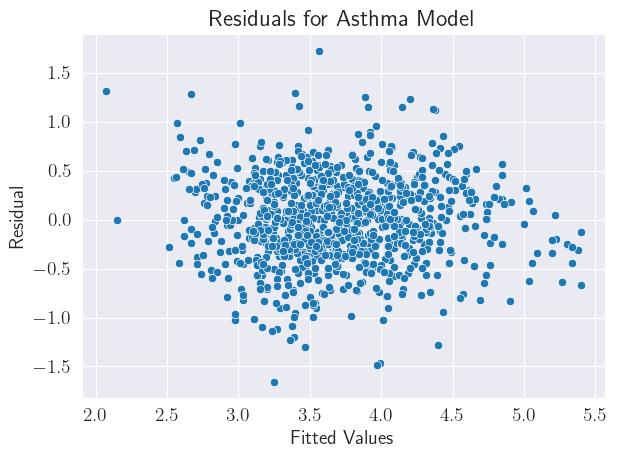

In [47]:
fig, ax = plt.subplots()
sns.scatterplot(x=model.predict(), y=model.resid, ax=ax)
ax.set_title('Residuals for Asthma Model')
ax.set_xlabel('Fitted Values')
ax.set_ylabel('Residual')
fig.tight_layout()
fig.savefig('1_res_vs_pred.png',dpi=300)

Could be a couple outliers where the absolute value of the residual is > 1.5

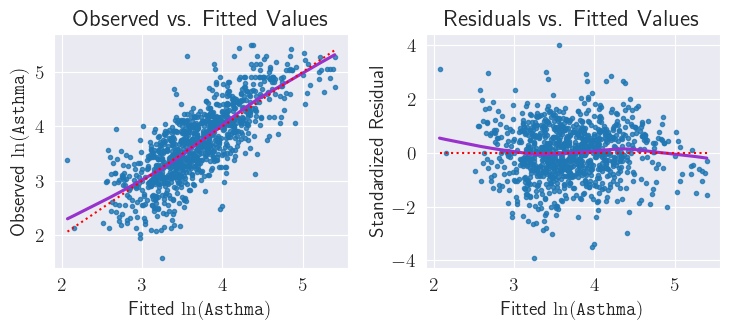

In [48]:
fig, ax = linearity_test(model,np.log(y_train))
fig.tight_layout()
ax[0].set_ylabel(r'Observed $\ln(\texttt{Asthma})$')
ax[0].set_xlabel(r'Fitted $\ln(\texttt{Asthma})$')
ax[1].set_xlabel(r'Fitted $\ln(\texttt{Asthma})$')
fig.savefig('1_assumption1.png',dpi=300)

These don't look too bad. The only part that looks a bit off is the low end, but there are only two data points in that region.


 Breusch-Pagan test ----
                                      value
Lagrange multiplier statistic  6.258411e+01
p-value                        4.111896e-08
f-value                        4.702917e+00
f p-value                      2.231352e-08

 Goldfeld-Quandt test ----
                value
F statistic  1.015966
p-value      0.431610

 Residuals plots ----


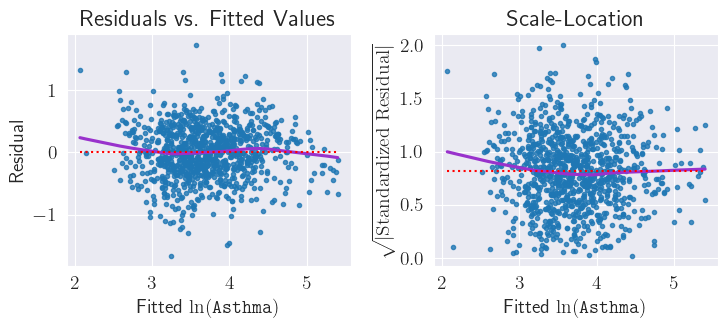

In [49]:
fig, ax = homoscedasticity_test(model)
ax[0].set_xlabel(r'Fitted $\ln(\texttt{Asthma})$')
ax[1].set_xlabel(r'Fitted $\ln(\texttt{Asthma})$')
fig.tight_layout()
fig.savefig('1_assumption2.png',dpi=300)

The plots don't look bad. The LOWESS line does vary slightly but that appears to be due to the two lowest fitted values. The Teh Breusch-Pagan test shows a significant result, but not the Goldfeld-Quandt test.

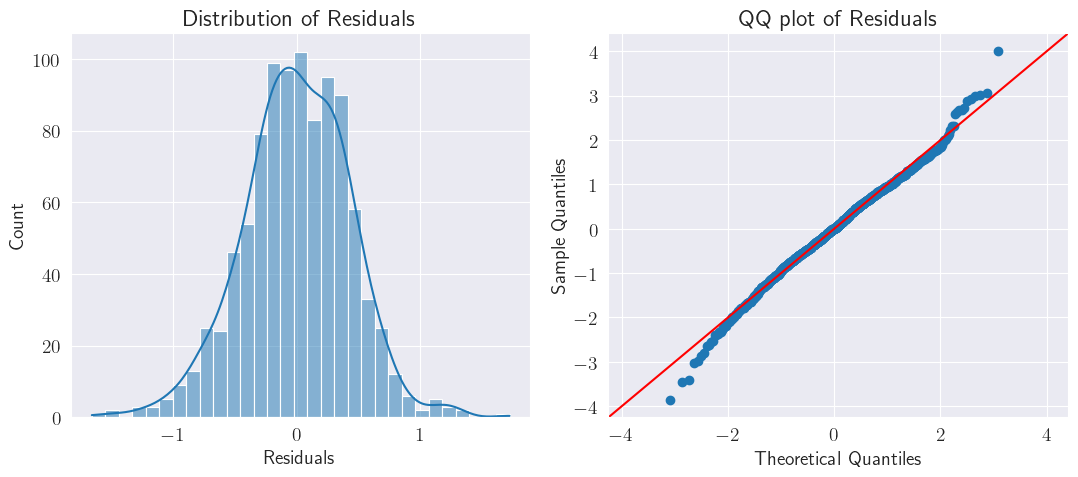

In [50]:
fig, axs = plot_resid_dist_qqplot(model)
fig.savefig('1_normal_resid.png',dpi=300)

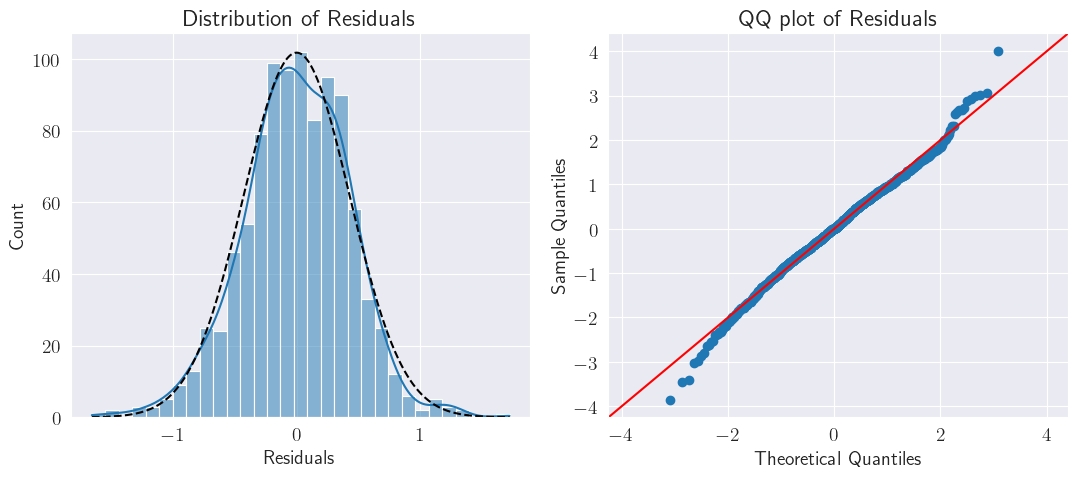

In [51]:
# add in a normal distribution for comparison
x_range = np.linspace(model.resid.min(),model.resid.max(),1000)
norm_dist = [stats.norm(loc=0,scale=model.resid.std()).pdf(x) for x in x_range]

fig, axs = plot_resid_dist_qqplot(model)

sns.lineplot(x=x_range, y=np.multiply(norm_dist, axs[0].get_ylim()[1]*.95 / np.max(norm_dist)), ax=axs[0], color='black', linestyle='--')
fig.tight_layout()
fig.savefig('1_assumption3.png',dpi=300)

Looks mostly normal. Slight deviantion seen in the tail ends of the qq plot, but not bad.

In [52]:
# Omnibus test
stats.normaltest(model.resid)

NormaltestResult(statistic=13.763809197996752, pvalue=0.0010261877066676686)

According to the Omnibus test we reject the null hypotheses that the residuals are normally distributed. 

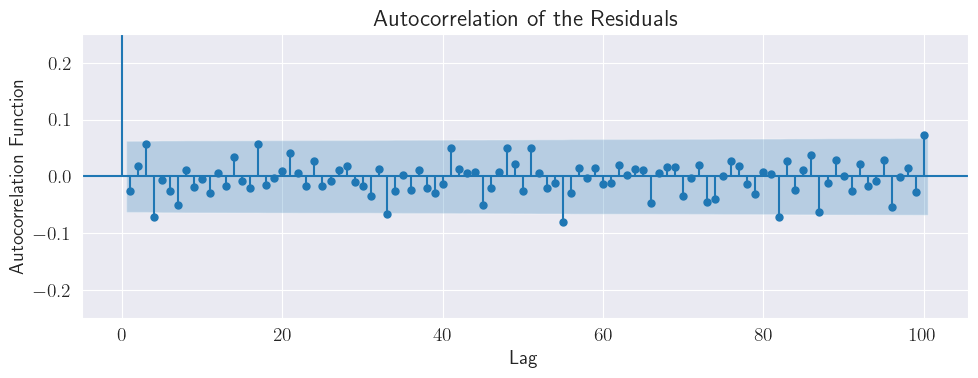

In [53]:
# data should be independent
import statsmodels.tsa.api as smt
    
fig, ax = plt.subplots(figsize=(10,4))
acf = smt.graphics.plot_acf(model.resid, lags=100, alpha=0.05, ax=ax)
ax.set_ylim(-.25,.25)
ax.set_ylabel('Autocorrelation Function')
ax.set_xlabel('Lag')
ax.set_title('Autocorrelation of the Residuals')
fig.tight_layout()
fig.savefig('1_autocorrelation_plot.png', dpi=300)

No issues there.

In [54]:
# Durbin-Watson -- As a rule of thumb, anything between 1.5 and 2.5 is OK
sms.durbin_watson(model.resid)

2.049577556861633

In [55]:
# outliers and influence points
influence = model.get_influence()
standard_resid = influence.resid_studentized_internal
student_resid = influence.resid_studentized_external
def plot_stand_stud_resid(model):
    influence = model.get_influence()
    standard_resid = influence.resid_studentized_internal
    student_resid = influence.resid_studentized_external
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(11,5), sharey=True)
    sns.scatterplot(x=model.predict(), y=standard_resid, ax=ax1)
    sns.scatterplot(x=model.predict(), y=student_resid, ax=ax2)
    for ax in [ax1,ax2]:
        xlim = ax.get_xlim()
        ax.axvline(x=xlim[0] + 1/3*(xlim[1]-xlim[0]), color='orchid', linestyle='--')
        ax.axvline(x=xlim[0] + 2/3*(xlim[1]-xlim[0]), color='orchid', linestyle='--')
        ax.axhline(y=0, color='orchid', linestyle='--')
        ax.set_xlabel('$\hat{y}$')
        ax.set_ylabel('Residuals')
    ax1.set_title('Standardized Residuals')
    ax2.set_title('Studentized Residuals')
    fig.tight_layout()
    return fig, (ax1, ax2)

<>:17: DeprecationWarning: invalid escape sequence \h
<>:17: DeprecationWarning: invalid escape sequence \h
C:\Users\elder\AppData\Local\Temp\ipykernel_21508\2935678923.py:17: DeprecationWarning: invalid escape sequence \h
  ax.set_xlabel('$\hat{y}$')


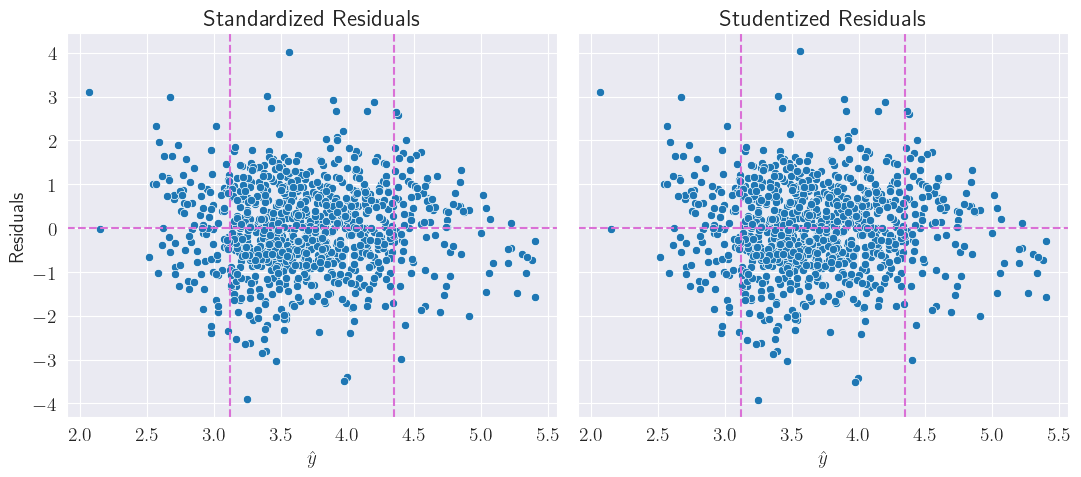

In [56]:
fig, (ax1, ax2) = plot_stand_stud_resid(model)
fig.savefig('1_stand_stud_resid.png')

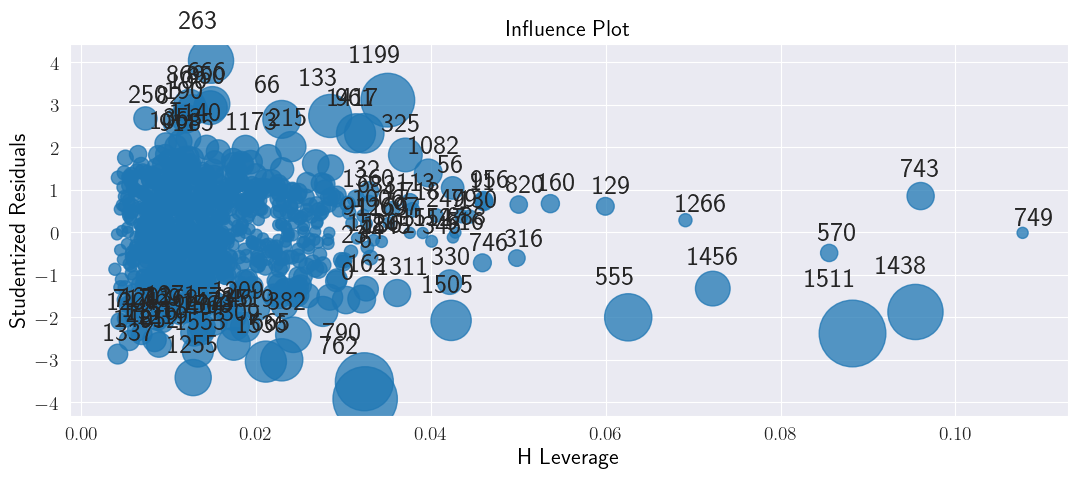

In [57]:
fig, ax = plt.subplots(figsize=(11,5))
smg.influence_plot(model, ax=ax)
fig.tight_layout()

In [58]:
# get influence points indicated in the plot, so I don't have to copy them by hand
# high residuals: |stud_resid| > t.ppf(1-alpha/2, df=df_resid) default alpha=.05; 
# high leverage: hat_i > 2(df_model + 1)/nobs;  
# source: https://www.statsmodels.org/dev/generated/statsmodels.graphics.regressionplots.influence_plot.html)
# influence points are those that are both high residual and high leverage
highlev = Xy_train[influence.hat_matrix_diag > 2 * (model.df_model + 1)/model.nobs].index
alpha=0.05
outliers = Xy_train[abs(influence.resid_studentized) > stats.t.ppf(1-alpha/2, df=model.df_resid)].index
infpts = [point for point in highlev if point in outliers]

# create a dataframe so the standardized and studentized residuals have the same index for plotting influence points
resid = model.resid
pred = model.fittedvalues
pred_df = pd.DataFrame({'pred':pred, 'resid':resid, 'stand_res':standard_resid, 'stud_res':student_resid})

In [59]:
print(f'High Residual Threshold: |stud_resid| > {stats.t.ppf(1-alpha/2, df=model.df_resid)}')
print(f'High Leverage Threshold: hat_i > {2 * (model.df_model + 1)/model.nobs}')

High Residual Threshold: |stud_resid| > 1.9624330157085406
High Leverage Threshold: hat_i > 0.030706243602865915


<>:7: DeprecationWarning: invalid escape sequence \h
<>:7: DeprecationWarning: invalid escape sequence \h
C:\Users\elder\AppData\Local\Temp\ipykernel_21508\2353921650.py:7: DeprecationWarning: invalid escape sequence \h
  ax.set_xlabel('$\hat{y}$')


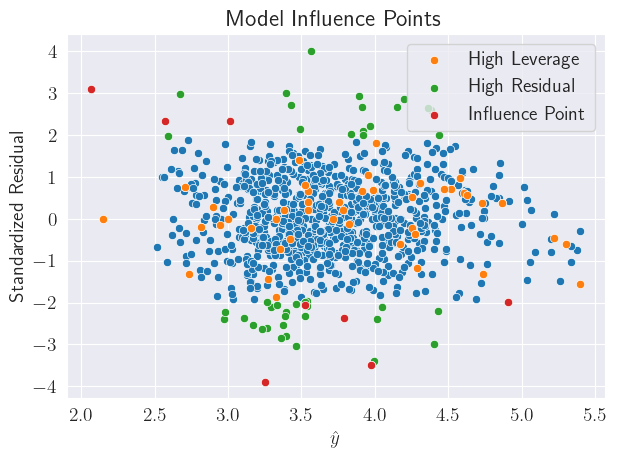

In [60]:
fig, ax = plt.subplots()
sns.scatterplot(x=model.predict(), y=standard_resid, ax=ax)
sns.scatterplot(x=pred_df.loc[highlev]['pred'], y=pred_df.loc[highlev]['stand_res'], ax=ax, label='High Leverage')
sns.scatterplot(x=pred_df.loc[outliers]['pred'], y=pred_df.loc[outliers]['stand_res'], ax=ax, label='High Residual')
sns.scatterplot(x=pred_df.loc[infpts]['pred'], y=pred_df.loc[infpts]['stand_res'], ax=ax, label='Influence Point')
ax.set_title('Model Influence Points')
ax.set_xlabel('$\hat{y}$')
ax.set_ylabel('Standardized Residual')
fig.tight_layout()
fig.savefig('1_standresid_influence_points.png')

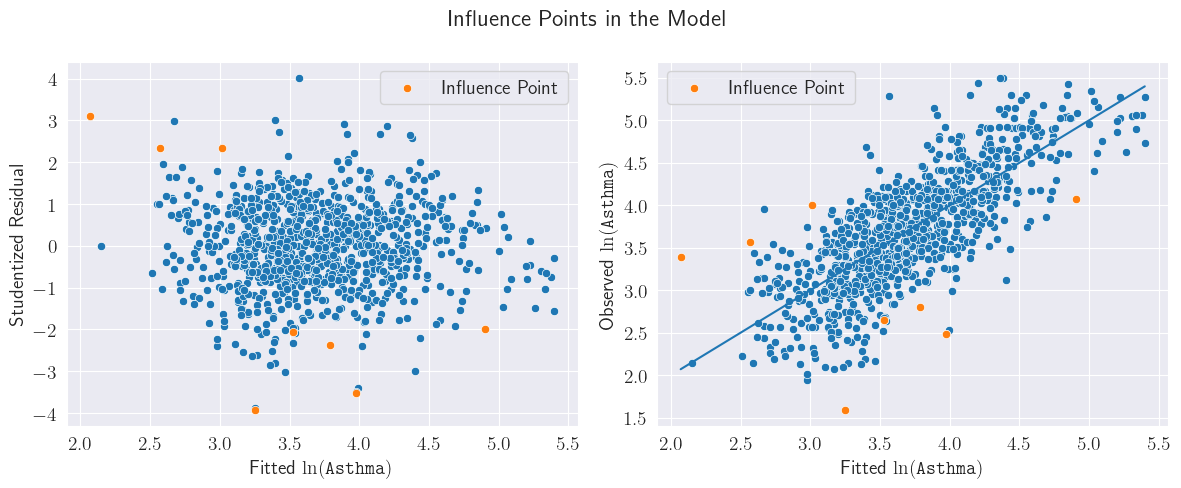

In [61]:
fig, (ax1,ax2) = plt.subplots(ncols=2,nrows=1, figsize=(12,5))
sns.scatterplot(x=model.predict(), y=standard_resid, ax=ax1)
# sns.scatterplot(x=pred_df.loc[highlev]['pred'], y=pred_df.loc[highlev]['stud_res'], ax=ax1, label='High Leverage')
# sns.scatterplot(x=pred_df.loc[outliers]['pred'], y=pred_df.loc[outliers]['stud_res'], ax=ax1, label='High Residual')
sns.scatterplot(x=pred_df.loc[infpts]['pred'], y=pred_df.loc[infpts]['stud_res'], ax=ax1, label='Influence Point')

ax1.set_xlabel(r'Fitted $\ln(\texttt{Asthma})$')
ax1.set_ylabel('Studentized Residual')

sns.scatterplot(x=model.fittedvalues, y=y_train.apply(np.log), ax=ax2)
# sns.scatterplot(x=pred[highlev], y=y_train[highlev].apply(np.log), ax=ax2, label='High Leverage')
# sns.scatterplot(x=pred[outliers], y=y_train[outliers].apply(np.log), ax=ax2, label='High Residual')
sns.scatterplot(x=pred[infpts], y=y_train[infpts].apply(np.log), ax=ax2, label='Influence Point')
sns.lineplot(x=model.fittedvalues, y=model.fittedvalues, ax=ax2)
ax2.set_xlabel(r'Fitted $\ln(\texttt{Asthma})$')
ax2.set_ylabel(r'Observed $\ln(\texttt{Asthma})$')
ax2.legend(loc='upper left')

fig.suptitle('Influence Points in the Model')
fig.tight_layout()
fig.savefig('1_influence_points_stud_res_pred.png', dpi=300)

In [62]:
Xy_train.loc[infpts]

TotalPopulation      Ozone         PM25  DieselPM  DrinkingWater   
CensusTract                                                                     
1199               65.375837  35.714286  1885.461914 -0.911303       5.552843  \
1417               77.910205  33.333333  2107.810560 -2.079442       5.276685   
555                45.398238  28.571429  2074.418130 -1.814005       5.127885   
1511              107.689368  24.390244  1730.563346 -5.521461       5.666634   
1505               91.334550  24.390244  1674.371193 -5.298317       5.915150   
790                71.084457  34.482759  2215.189805 -2.385967       4.685920   
762                95.634722  30.303030  1550.889294 -0.962335       5.860701   
961                81.148013  33.333333  1445.081147 -3.729701       6.534617   

              Lead  ToxRelease   Traffic  GroundwaterThreats  HazWaste   
CensusTract                                                              
1199         57.37    8.529334  6.448033            1.829791  1.207746  \
1417         43.71    8.814957  5.829594            0.316228  3.162278   
555          74.34   24.122313  4.696287            1.950034  1.524780   
1511          8.45    7.631800  6.705553            0.316228  3.162278   
1505          6.23    6.922144  6.025441            0.316228  3.162278   
790          50.71    9.717813  3.040710            2.220477  1.059030   
762          22.73    4.597757  6.700792            2.139675  1.059030   
961          31.98    5.426561  6.294247            0.316228  3.162278   

             ImpWaterBodies  SolidWaste  Education  LinguisticIsolation   
CensusTract                                                               
1199               1.778724   10.000000   0.000000             0.900000  \
1417               1.002491    0.995037   0.945742             0.100000   
555                1.732532   10.000000   1.377449             1.345362   
1511               0.316228   10.000000   1.422971             2.431049   
1505               0.316228   10.000000   1.431569             3.116087   
790                1.002491   10.000000   0.974004             0.953939   
762                0.316228    0.353333   1.046635             2.703701   
961                1.002491   10.000000   1.189207             3.132092   

              Poverty  Unemployment  Asthma  
CensusTract                                  
1199         1.193922      2.366432   29.57  
1417         0.095310      1.549193   35.22  
555          3.182212      3.937004   58.45  
1511         1.987874      1.643168   16.57  
1505         1.774952      2.049390   14.14  
790          4.225373      3.098387   12.01  
762          3.788725      2.509980    4.93  
961          2.708050      1.870829   54.82

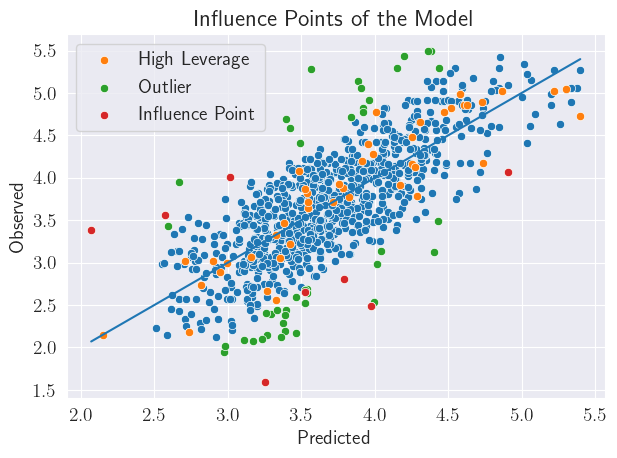

In [63]:
fig, ax = plt.subplots()
sns.scatterplot(x=model.fittedvalues, y=y_train.apply(np.log), ax=ax)
sns.scatterplot(x=pred[highlev], y=y_train[highlev].apply(np.log), ax=ax, label='High Leverage')
sns.scatterplot(x=pred[outliers], y=y_train[outliers].apply(np.log), ax=ax, label='Outlier')
sns.scatterplot(x=pred[infpts], y=y_train[infpts].apply(np.log), ax=ax, label='Influence Point')
sns.lineplot(x=model.fittedvalues, y=model.fittedvalues, ax=ax)
ax.set_title('Influence Points of the Model')
ax.set_xlabel('Predicted')
ax.set_ylabel('Observed')
fig.tight_layout()
# fig.savefig('influence_points_model_obs_pred.png')

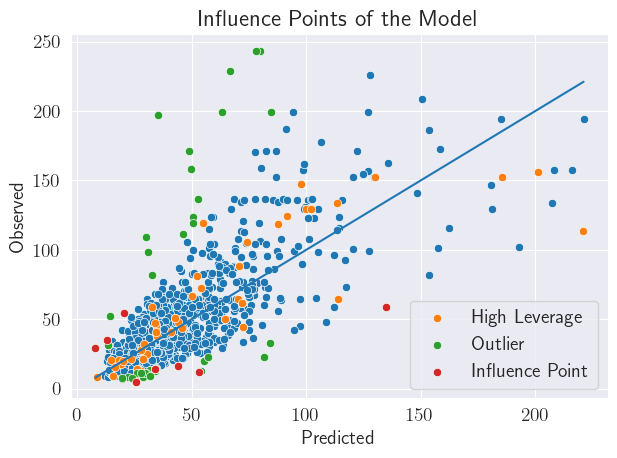

In [64]:
fig, ax = plt.subplots()
sns.scatterplot(x=model.fittedvalues.apply(np.exp), y=y_train, ax=ax)
sns.scatterplot(x=pred[highlev].apply(np.exp), y=y_train[highlev], ax=ax, label='High Leverage')
sns.scatterplot(x=pred[outliers].apply(np.exp), y=y_train[outliers], ax=ax, label='Outlier')
sns.scatterplot(x=pred[infpts].apply(np.exp), y=y_train[infpts], ax=ax, label='Influence Point')
sns.lineplot(x=model.fittedvalues.apply(np.exp), y=model.fittedvalues.apply(np.exp), ax=ax)
ax.set_title('Influence Points of the Model')
ax.set_xlabel('Predicted')
ax.set_ylabel('Observed')
fig.tight_layout()
# fig.savefig('influence_points_model_obs_pred.png')


In [65]:
# check multicolinearity (Variance Inflation Factors)
_, Xdm = dmatrices(formula, data=Xy_train, return_type='dataframe')
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(Xdm.values, ii).round(2) for ii in range(Xdm.shape[1])]
vif['features'] = Xdm.columns
print(vif)

        VIF                          features
0   1026.45                         Intercept
1      7.29                     DrinkingWater
2      1.56                        ToxRelease
3      3.46                         Education
4      2.13               LinguisticIsolation
5      2.75                           Poverty
6      1.36                      Unemployment
7      2.91                   TotalPopulation
8     20.10                          DieselPM
9     21.98          TotalPopulation:DieselPM
10     1.64                             Ozone
11    91.68                GroundwaterThreats
12    91.94  DrinkingWater:GroundwaterThreats
13    18.71                              Lead
14    18.91                      I(Lead ** 2)


Looks like there is multicollinearity with higher order terms, which is expected. Since we are after prediction and not inferences about the parameters, multicollinearity isn't a concern anyway.  
Despite this let's check the standardized data that was created for the lasso regression.

In [66]:
_, Xdm = dmatrices(formula, data=X_poly.join(y_train), return_type='dataframe')
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(Xdm.values, ii).round(2) for ii in range(Xdm.shape[1])]
vif['features'] = Xdm.columns
print(vif)

     VIF                          features
0   1.86                         Intercept
1   1.59                     DrinkingWater
2   1.56                        ToxRelease
3   3.46                         Education
4   2.13               LinguisticIsolation
5   2.75                           Poverty
6   1.36                      Unemployment
7   1.12                   TotalPopulation
8   1.60                          DieselPM
9   1.03          TotalPopulation:DieselPM
10  1.64                             Ozone
11  1.22                GroundwaterThreats
12  1.12  DrinkingWater:GroundwaterThreats
13  1.95                              Lead
14  1.15                      I(Lead ** 2)


If we used standardized data the multicolinearity would not be an issue.

In [67]:
# lets look at the model with standardized variables
model_s = smf.ols(formula, X_poly.join(y_train)).fit()
print(model_s.summary2())
print(model.summary2())

                         Results: Ordinary least squares
Model:                    OLS                   Adj. R-squared:         0.597    
Dependent Variable:       I(np.log(Asthma))     AIC:                    1150.6676
Date:                     2023-09-06 21:07      BIC:                    1223.9349
No. Observations:         977                   Log-Likelihood:         -560.33  
Df Model:                 14                    F-statistic:            104.3    
Df Residuals:             962                   Prob (F-statistic):     1.04e-181
R-squared:                0.603                 Scale:                  0.18724  
---------------------------------------------------------------------------------
                                  Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
---------------------------------------------------------------------------------
Intercept                         3.6143   0.0189 191.1901 0.0000  3.5772  3.6514
DrinkingWater                    -0.0630 

In [68]:
# check the range of the X data used for training, validation, and test
for col in X_train.columns:
    if col not in model.params:
        continue
    if X_val[col].min() < X_train[col].min():
        print(f'{col} validation range ({X_val[col].min()}) lower than training range({X_train[col].min()}).')
    if X_val[col].max() > X_train[col].max():
        print(f'{col} validation range ({X_val[col].max()}) greater than training range({X_train[col].max()}).')


TotalPopulation validation range (24.939927826679853) lower than training range(25.865034312755125).
DrinkingWater validation range (7.041814032527442) greater than training range(6.8158592642776).
GroundwaterThreats validation range (4.888120602552267) greater than training range(4.336724510524952).
Education validation range (2.7923888475366696) greater than training range(2.7392211653901968).
LinguisticIsolation validation range (8.672369918309528) greater than training range(7.918964578781749).
Unemployment validation range (4.415880433163924) greater than training range(4.242640687119285).


In [69]:
for col in X_train.columns:
    if col not in model.params:
        continue
    if X_test[col].min() < X_train[col].min():
        print(f'{col} test range ({X_test[col].min()}) lower than training range({X_train[col].min()}).')
    if X_test[col].max() > X_train[col].max():
        print(f'{col} test range ({X_test[col].max()}) greater than training range({X_train[col].max()}).')


DrinkingWater test range (4.600961341214036) lower than training range(4.665700685728123).


# Other figures and tables for report

In [70]:
model.summary2(alpha=0.02).tables[1]

Coef.  Std.Err.          t         P>|t|   
Intercept                         1.334634  0.443530   3.009117  2.688358e-03  \
DrinkingWater                     0.182094  0.066968   2.719105  6.663745e-03   
ToxRelease                        0.052481  0.006098   8.605615  3.056584e-17   
Education                         0.909776  0.060992  14.916220  2.038878e-45   
LinguisticIsolation              -0.171982  0.015927 -10.798377  9.773781e-26   
Poverty                           0.245145  0.033408   7.337853  4.610753e-13   
Unemployment                      0.107513  0.027911   3.851961  1.249348e-04   
TotalPopulation                  -0.005894  0.001786  -3.299851  1.002885e-03   
DieselPM                          0.225900  0.054021   4.181671  3.157863e-05   
TotalPopulation:DieselPM         -0.002909  0.000756  -3.846117  1.279046e-04   
Ozone                            -0.010090  0.004088  -2.467920  1.376313e-02   
GroundwaterThreats                0.956079  0.163709   5.840101  7.131058e-09   
DrinkingWater:GroundwaterThreats -0.158115  0.029078  -5.437593  6.848751e-08   
Lead                             -0.017937  0.002864  -6.263434  5.669871e-10   
I(Lead ** 2)                      0.000167  0.000030   5.621516  2.479453e-08   

                                     [0.01     0.99]  
Intercept                         0.301107  2.368161  
DrinkingWater                     0.026042  0.338146  
ToxRelease                        0.038270  0.066692  
Education                         0.767649  1.051902  
LinguisticIsolation              -0.209095 -0.134869  
Poverty                           0.167296  0.322993  
Unemployment                      0.042473  0.172553  
TotalPopulation                  -0.010057 -0.001732  
DieselPM                          0.100017  0.351782  
TotalPopulation:DieselPM         -0.004672 -0.001147  
Ozone                            -0.019616 -0.000563  
GroundwaterThreats                0.574598  1.337559  
DrinkingWater:GroundwaterThreats -0.225873 -0.090356  
Lead                             -0.024610 -0.011264  
I(Lead ** 2)                      0.000098  0.000236

In [71]:
model.summary2(alpha=0.02).tables[1].round(3)

Coef.  Std.Err.       t  P>|t|  [0.01  0.99]
Intercept                         1.335     0.444   3.009  0.003  0.301  2.368
DrinkingWater                     0.182     0.067   2.719  0.007  0.026  0.338
ToxRelease                        0.052     0.006   8.606  0.000  0.038  0.067
Education                         0.910     0.061  14.916  0.000  0.768  1.052
LinguisticIsolation              -0.172     0.016 -10.798  0.000 -0.209 -0.135
Poverty                           0.245     0.033   7.338  0.000  0.167  0.323
Unemployment                      0.108     0.028   3.852  0.000  0.042  0.173
TotalPopulation                  -0.006     0.002  -3.300  0.001 -0.010 -0.002
DieselPM                          0.226     0.054   4.182  0.000  0.100  0.352
TotalPopulation:DieselPM         -0.003     0.001  -3.846  0.000 -0.005 -0.001
Ozone                            -0.010     0.004  -2.468  0.014 -0.020 -0.001
GroundwaterThreats                0.956     0.164   5.840  0.000  0.575  1.338
DrinkingWater:GroundwaterThreats -0.158     0.029  -5.438  0.000 -0.226 -0.090
Lead                             -0.018     0.003  -6.263  0.000 -0.025 -0.011
I(Lead ** 2)                      0.000     0.000   5.622  0.000  0.000  0.000

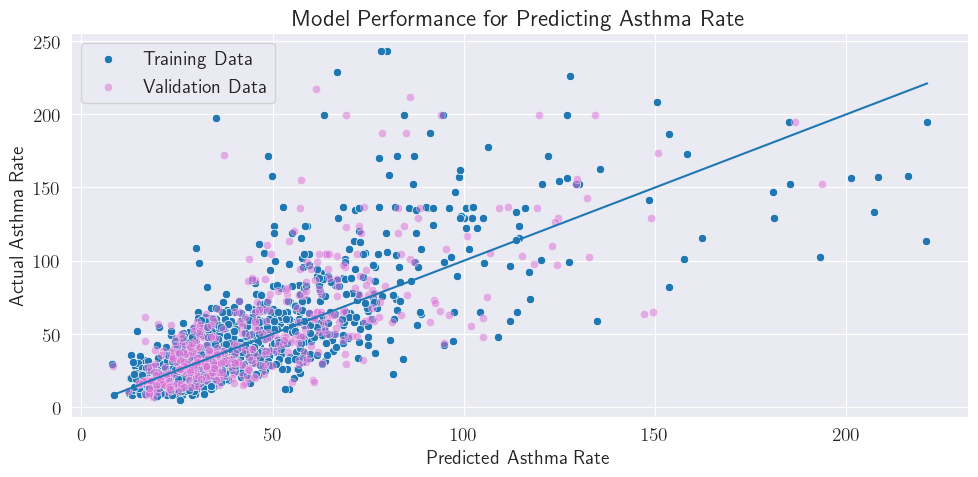

In [72]:
# act vs pred scatterplot
pred_val = model.predict(X_val)

fig, ax = plt.subplots(figsize=(10,5))
# sns.scatterplot(x=model.fittedvalues, y=y_train, ax=ax)
sns.scatterplot(x=np.exp(pred), y=y_train, ax=ax, label='Training Data')
sns.scatterplot(x=np.exp(pred_val), y=y_val, ax=ax, label='Validation Data', color='orchid', alpha=.5)
# sns.scatterplot(x=np.exp(pred[infpts]), y=y_train[infpts], ax=ax, label='Influence Points', color='r')
# sns.scatterplot(x=pred[outliers], y=y_train[outliers], ax=ax, label='Outliers (Training)')
sns.lineplot(x=np.exp(model.fittedvalues), y=np.exp(model.fittedvalues), ax=ax)
ax.set_title('Model Performance for Predicting Asthma Rate')
ax.set_xlabel('Predicted Asthma Rate')
ax.set_ylabel('Actual Asthma Rate')
# ax.legend(bbox_to_anchor=(1,1))
fig.tight_layout()
# fig.savefig('1_model_obs_pred_inf.png')
fig.savefig('1_model_obs_pred.png', dpi=300)

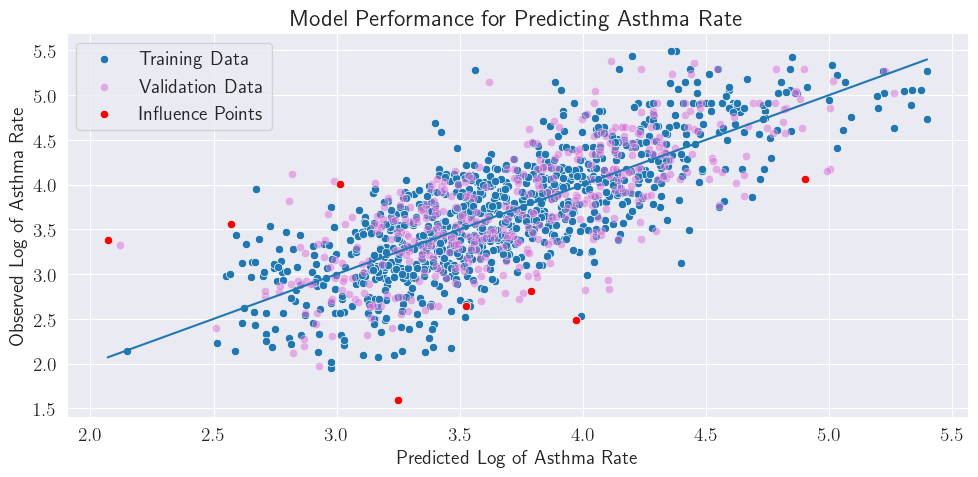

In [73]:
# act vs pred scatterplot
pred_val = model.predict(X_val)

fig, ax = plt.subplots(figsize=(10,5))
sns.scatterplot(x=pred, y=y_train.apply(np.log), ax=ax, label='Training Data')
sns.scatterplot(x=pred_val, y=y_val.apply(np.log), ax=ax, label='Validation Data', color='orchid', alpha=.5)
sns.scatterplot(x=pred[infpts], y=y_train[infpts].apply(np.log), ax=ax, label='Influence Points', color='r')
sns.lineplot(x=model.fittedvalues, y=model.fittedvalues, ax=ax)
ax.set_title('Model Performance for Predicting Asthma Rate')
ax.set_xlabel('Predicted Log of Asthma Rate')
ax.set_ylabel('Observed Log of Asthma Rate')
# ax.legend(bbox_to_anchor=(1,1))
fig.tight_layout()
# fig.savefig('1_model_obs_pred_inf.png')

# Make Predictions for Test Data

In [74]:
dftestpred = model.get_prediction(X_test,row_labels=X_test.index).summary_frame(0.1)
dftestpred.head()

mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower   
CensusTract                                                                   
14           4.964890  0.071997       4.846351       5.083428      4.242658  \
21           3.950171  0.063111       3.846263       4.054080      3.230196   
31           4.380062  0.060470       4.280502       4.479622      3.660701   
35           4.886883  0.044708       4.813274       4.960491      4.170652   
58           4.914794  0.057596       4.819965       5.009622      4.196073   

             obs_ci_upper  
CensusTract                
14               5.687121  
21               4.670147  
31               5.099423  
35               5.603113  
58               5.633515

In [75]:
dftestpred.drop(['mean_se','mean_ci_lower','mean_ci_upper'], axis=1, inplace=True)

In [76]:
dftestpred.rename(index={'CensusTract':'Census Tract'},columns={'mean':'Prediction','obs_ci_lower':'Lower Prediction CI', 'obs_ci_upper':'Upper Prediction CI'}, inplace=True)

In [77]:
test_predictions = dftestpred.apply(np.exp)

In [78]:
test_predictions

Prediction  Lower Prediction CI  Upper Prediction CI
CensusTract                                                      
14           143.292731            69.592564           295.043113
21            51.944264            25.284611           106.713390
31            79.842993            38.888611           163.927264
35           132.539737            64.757677           271.269491
58           136.291203            66.424947           279.643311
...                 ...                  ...                  ...
1515          44.364521            21.640671            90.949617
1530          29.957465            14.607812            61.436284
1543          20.515088            10.023969            41.986247
1555          23.962732            11.639198            49.334374
1556          17.867659             8.631470            36.987122

[100 rows x 3 columns]

In [79]:
test_predictions.to_csv('peterson_richy.csv')

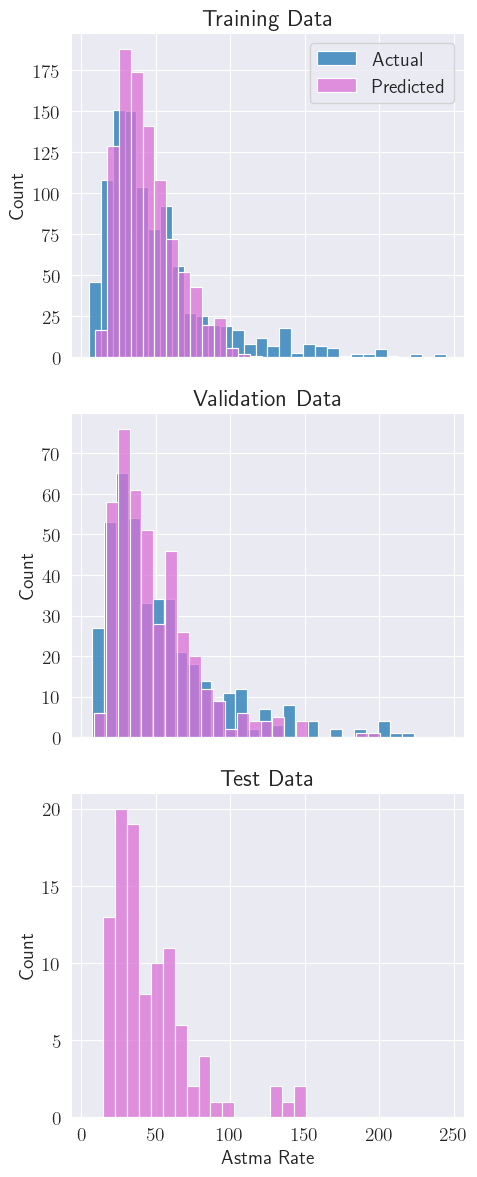

In [80]:
# see if the distributions of the response variable of the data splits are similar
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(5,12), sharex=True)
sns.histplot(x=y_train, binwidth=8, ax=axs[0], label='Actual')
sns.histplot(x=y_val, binwidth=8, ax=axs[1], label='Actual')
sns.histplot(x=pred_train, binwidth=8, ax=axs[0], label='Predicted', color='orchid')
sns.histplot(x=pred_val.apply(np.exp), binwidth=8, ax=axs[1], label='Predicted', color='orchid')
sns.histplot(data=test_predictions,x='Prediction', binwidth=8, ax=axs[2], color='orchid')
axs[0].set_title('Training Data')
axs[1].set_title('Validation Data')
axs[2].set_title('Test Data')
axs[0].legend()
axs[2].set_xlabel('Astma Rate')
fig.tight_layout()

***
### Misc items to assist in writing the report. 

In [81]:
# see what main variables are used in at least one candidate model
[col for col in X_train.columns if ((col in model1.params) | (col in model2.params) | (col in model3.params))]

['TotalPopulation',
 'Ozone',
 'PM25',
 'DieselPM',
 'DrinkingWater',
 'Lead',
 'ToxRelease',
 'Traffic',
 'GroundwaterThreats',
 'HazWaste',
 'ImpWaterBodies',
 'SolidWaste',
 'Education',
 'LinguisticIsolation',
 'Poverty',
 'Unemployment']

In [82]:
# see what main variables are used in all models
[col for col in X_train.columns if ((col in model1.params) & (col in model2.params) & (col in model3.params))]

['Ozone',
 'DieselPM',
 'DrinkingWater',
 'Lead',
 'ToxRelease',
 'GroundwaterThreats',
 'Education',
 'LinguisticIsolation',
 'Poverty',
 'Unemployment']

In [83]:
# see what other variables are used in all models
[col for col in model1.params.index if ((col in model2.params) & (col in model3.params) & (col not in X_train.columns))]

['Intercept', 'I(Lead ** 2)']

In [84]:
# print out variables in order of x1, x2, ... to make it easy to copy to report.
def print_params_for_report(model):
    print(f"{model.params['Intercept']:10.4f}  {'Intercept'}\n")
    for col in X_train.columns:
        if col in model.params:
            print(f'{model.params[col]:10.4f}   {col}')
    print()

    for col in model.params.index:
        if '**' in col:
            print(f'{model.params[col]:10.4f}   {col}')

    print()        
    for col in model.params.index:
        if (('**' in col) | (col=='Intercept')):
            continue
        if col not in X_train.columns:
            print(f'{model.params[col]:10.4f}   {col}')

In [85]:
print_params_for_report(model1)

    6.3998  Intercept

   -0.2952   Ozone
    0.2144   DieselPM
    0.1006   DrinkingWater
   -0.0174   Lead
    0.0506   ToxRelease
   -0.5823   GroundwaterThreats
   -0.0799   ImpWaterBodies
   -0.0107   SolidWaste
    0.8276   Education
    0.5787   LinguisticIsolation
    0.6905   Poverty
   -0.5182   Unemployment

    0.0054   I(Ozone ** 2)
    0.0002   I(Lead ** 2)
   -0.0192   I(LinguisticIsolation ** 2)

    0.0215   Ozone:GroundwaterThreats
   -0.0255   Ozone:Poverty
   -0.1000   DieselPM:Unemployment
   -0.1082   DrinkingWater:LinguisticIsolation
    0.1481   Poverty:Unemployment


In [86]:
print_params_for_report(model2)

    4.8437  Intercept

    0.0052   TotalPopulation
   -0.3203   Ozone
    0.0012   PM25
    0.5364   DieselPM
    0.6343   DrinkingWater
    0.0201   Lead
    0.0658   ToxRelease
   -0.5388   Traffic
    0.0136   GroundwaterThreats
   -0.1496   HazWaste
    0.2157   ImpWaterBodies
    0.1618   SolidWaste
    2.0918   Education
   -0.1036   LinguisticIsolation
    0.0398   Poverty
   -0.4175   Unemployment

   -0.0001   I(TotalPopulation ** 2)
    0.0060   I(Ozone ** 2)
   -0.0000   I(PM25 ** 2)
    0.0002   I(Lead ** 2)
   -0.0282   I(LinguisticIsolation ** 2)

   -0.0011   TotalPopulation:DieselPM
    0.0033   TotalPopulation:ImpWaterBodies
    0.0167   TotalPopulation:Education
   -0.0027   TotalPopulation:LinguisticIsolation
   -0.0051   TotalPopulation:Poverty
   -0.0029   TotalPopulation:Unemployment
   -0.0074   Ozone:ToxRelease
    0.0097   Ozone:Traffic
    0.0141   Ozone:GroundwaterThreats
   -0.0114   Ozone:ImpWaterBodies
   -0.0012   Ozone:SolidWaste
   -0.0184   Ozone:Educ

In [87]:
model2.params['I(PM25 ** 2)']

-2.65054824235947e-07

In [88]:
print_params_for_report(model3)

    1.3346  Intercept

   -0.0059   TotalPopulation
   -0.0101   Ozone
    0.2259   DieselPM
    0.1821   DrinkingWater
   -0.0179   Lead
    0.0525   ToxRelease
    0.9561   GroundwaterThreats
    0.9098   Education
   -0.1720   LinguisticIsolation
    0.2451   Poverty
    0.1075   Unemployment

    0.0002   I(Lead ** 2)

   -0.0029   TotalPopulation:DieselPM
   -0.1581   DrinkingWater:GroundwaterThreats


In [89]:
model3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Ordinary least squares
=================================================================================
Model:                    OLS                   Adj. R-squared:         0.597    
Dependent Variable:       I(np.log(Asthma))     AIC:                    1150.6676
Date:                     2023-09-06 21:07      BIC:                    1223.9349
No. Observations:         977                   Log-Likelihood:         -560.33  
Df Model:                 14                    F-statistic:            104.3    
Df Residuals:             962                   Prob (F-statistic):     1.04e-181
R-squared:                0.603                 Scale:                  0.18724  
---------------------------------------------------------------------------------
                                  Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
---------------------------------------------------------------------------------
Intercept                         1.3346   0.4435   3.0091 0.0027  0.4642  2.2050
DrinkingWater                     0.1821   0.0670   2.7191 0.0067  0.0507  0.3135
ToxRelease                        0.0525   0.0061   8.6056 0.0000  0.0405  0.0644
Education                         0.9098   0.0610  14.9162 0.0000  0.7901  1.0295
LinguisticIsolation              -0.1720   0.0159 -10.7984 0.0000 -0.2032 -0.1407
Poverty                           0.2451   0.0334   7.3379 0.0000  0.1796  0.3107
Unemployment                      0.1075   0.0279   3.8520 0.0001  0.0527  0.1623
TotalPopulation                  -0.0059   0.0018  -3.2999 0.0010 -0.0094 -0.0024
DieselPM                          0.2259   0.0540   4.1817 0.0000  0.1199  0.3319
TotalPopulation:DieselPM         -0.0029   0.0008  -3.8461 0.0001 -0.0044 -0.0014
Ozone                            -0.0101   0.0041  -2.4679 0.0138 -0.0181 -0.0021
GroundwaterThreats                0.9561   0.1637   5.8401 0.0000  0.6348  1.2773
DrinkingWater:GroundwaterThreats -0.1581   0.0291  -5.4376 0.0000 -0.2152 -0.1011
Lead                             -0.0179   0.0029  -6.2634 0.0000 -0.0236 -0.0123
I(Lead ** 2)                      0.0002   0.0000   5.6215 0.0000  0.0001  0.0002
---------------------------------------------------------------------------------
Omnibus:                    13.764            Durbin-Watson:               2.050 
Prob(Omnibus):              0.001             Jarque-Bera (JB):            19.933
Skew:                       -0.126            Prob(JB):                    0.000 
Kurtosis:                   3.653             Condition No.:               114858
=================================================================================
* The condition number is large (1e+05). This might indicate             strong
multicollinearity or other numerical problems.
"""